In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns

import missingno as msno

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc, confusion_matrix, accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
cred_data = pd.read_csv(r"D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\Credit Default.csv")

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

In [5]:
cred_data.shape

(30000, 25)

In [6]:
pd.set_option('display.max_columns',25)
cred_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [7]:
#deleting id column
cred_data.drop('ID', axis=1, inplace=True)

Renaming the columns for better understanding.

In [8]:
cred_data.rename(
    columns={"PAY_0": "Pay_status_Sept", "PAY_2": "Pay_status_Aug", 
             "PAY_3": "Pay_status_July", "PAY_4": "Pay_status_June",
             "PAY_5": "Pay_status_May", "PAY_6": "Pay_status_April",
             "BILL_AMT1": "Bill_stmt_Sept", "BILL_AMT2": "Bill_stmt_Aug",
             "BILL_AMT3": "Bill_stmt_July", "BILL_AMT4": "Bill_stmt_June",
             "BILL_AMT5": "Bill_stmt_May", "BILL_AMT6": "Bill_stmt_April",
             "PAY_AMT1": "Prev_pay_Sept", "PAY_AMT2": "Prev_pay_Aug",
             "PAY_AMT3": "Prev_pay_July", "PAY_AMT4": "Prev_pay_June",
             "PAY_AMT5": "Prev_pay_May", "PAY_AMT6": "Prev_pay_April",
             "default.payment.next.month":"default_payment_next_month"},inplace=True)

In [9]:
cred_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Pay_status_Sept',
       'Pay_status_Aug', 'Pay_status_July', 'Pay_status_June',
       'Pay_status_May', 'Pay_status_April', 'Bill_stmt_Sept', 'Bill_stmt_Aug',
       'Bill_stmt_July', 'Bill_stmt_June', 'Bill_stmt_May', 'Bill_stmt_April',
       'Prev_pay_Sept', 'Prev_pay_Aug', 'Prev_pay_July', 'Prev_pay_June',
       'Prev_pay_May', 'Prev_pay_April', 'default_payment_next_month'],
      dtype='object')

In [10]:
cred_data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [11]:
cred_data['SEX'].replace({1:"male", 2:"female"},inplace=True)

In [12]:
cred_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [13]:
cred_data['EDUCATION'].replace({1:"graduate_school", 2:"university",
                                3:"high_school", 4:"others", 5:"unknown",
                                6:"unknown", 0:"unknown"},inplace=True)

In [14]:
cred_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [15]:
cred_data['MARRIAGE'].replace({1:"married", 2:"single",
                                3:"others", 0:"unknown"},inplace=True)

In [16]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   Pay_status_Sept             30000 non-null  int64  
 6   Pay_status_Aug              30000 non-null  int64  
 7   Pay_status_July             30000 non-null  int64  
 8   Pay_status_June             30000 non-null  int64  
 9   Pay_status_May              30000 non-null  int64  
 10  Pay_status_April            30000 non-null  int64  
 11  Bill_stmt_Sept              30000 non-null  float64
 12  Bill_stmt_Aug               30000 non-null  float64
 13  Bill_stmt_July              300

In [17]:
cat_cols = []
for cols in cred_data.select_dtypes("object"):
    cat_cols.append(cols)
    
num_cols = []
for cols in cred_data.select_dtypes(["int64", "float64"]):
    num_cols.append(cols)

In [18]:
cat_cols.extend(['Pay_status_Sept', 'Pay_status_Aug', 'Pay_status_July', 'Pay_status_June', 'Pay_status_May', 
                 'Pay_status_April', 'default_payment_next_month'])

In [19]:
cred_data[cat_cols] = cred_data[cat_cols].astype("category")

In [20]:
cat_cols

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'Pay_status_Sept',
 'Pay_status_Aug',
 'Pay_status_July',
 'Pay_status_June',
 'Pay_status_May',
 'Pay_status_April',
 'default_payment_next_month']

In [21]:
num_cols.remove('Pay_status_Sept')
num_cols.remove('Pay_status_Aug')
num_cols.remove('Pay_status_July')
num_cols.remove('Pay_status_June')
num_cols.remove('Pay_status_May')
num_cols.remove('Pay_status_April')
num_cols.remove('default_payment_next_month')
num_cols

['LIMIT_BAL',
 'AGE',
 'Bill_stmt_Sept',
 'Bill_stmt_Aug',
 'Bill_stmt_July',
 'Bill_stmt_June',
 'Bill_stmt_May',
 'Bill_stmt_April',
 'Prev_pay_Sept',
 'Prev_pay_Aug',
 'Prev_pay_July',
 'Prev_pay_June',
 'Prev_pay_May',
 'Prev_pay_April']

In [22]:
#missing values
cred_data.replace({'unknown':np.nan}, inplace=True)

In [23]:
cred_data.isnull().sum()

LIMIT_BAL                       0
SEX                             0
EDUCATION                     345
MARRIAGE                       54
AGE                             0
Pay_status_Sept                 0
Pay_status_Aug                  0
Pay_status_July                 0
Pay_status_June                 0
Pay_status_May                  0
Pay_status_April                0
Bill_stmt_Sept                  0
Bill_stmt_Aug                   0
Bill_stmt_July                  0
Bill_stmt_June                  0
Bill_stmt_May                   0
Bill_stmt_April                 0
Prev_pay_Sept                   0
Prev_pay_Aug                    0
Prev_pay_July                   0
Prev_pay_June                   0
Prev_pay_May                    0
Prev_pay_April                  0
default_payment_next_month      0
dtype: int64

In [24]:
#Imputing null values in categorical features
from sklearn.impute import SimpleImputer
df = pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(cred_data[cat_cols]))
df.columns = cat_cols

In [25]:
cred_data[cat_cols] = df

In [26]:
cred_data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Pay_status_Sept               0
Pay_status_Aug                0
Pay_status_July               0
Pay_status_June               0
Pay_status_May                0
Pay_status_April              0
Bill_stmt_Sept                0
Bill_stmt_Aug                 0
Bill_stmt_July                0
Bill_stmt_June                0
Bill_stmt_May                 0
Bill_stmt_April               0
Prev_pay_Sept                 0
Prev_pay_Aug                  0
Prev_pay_July                 0
Prev_pay_June                 0
Prev_pay_May                  0
Prev_pay_April                0
default_payment_next_month    0
dtype: int64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

<Figure size 2880x1080 with 0 Axes>

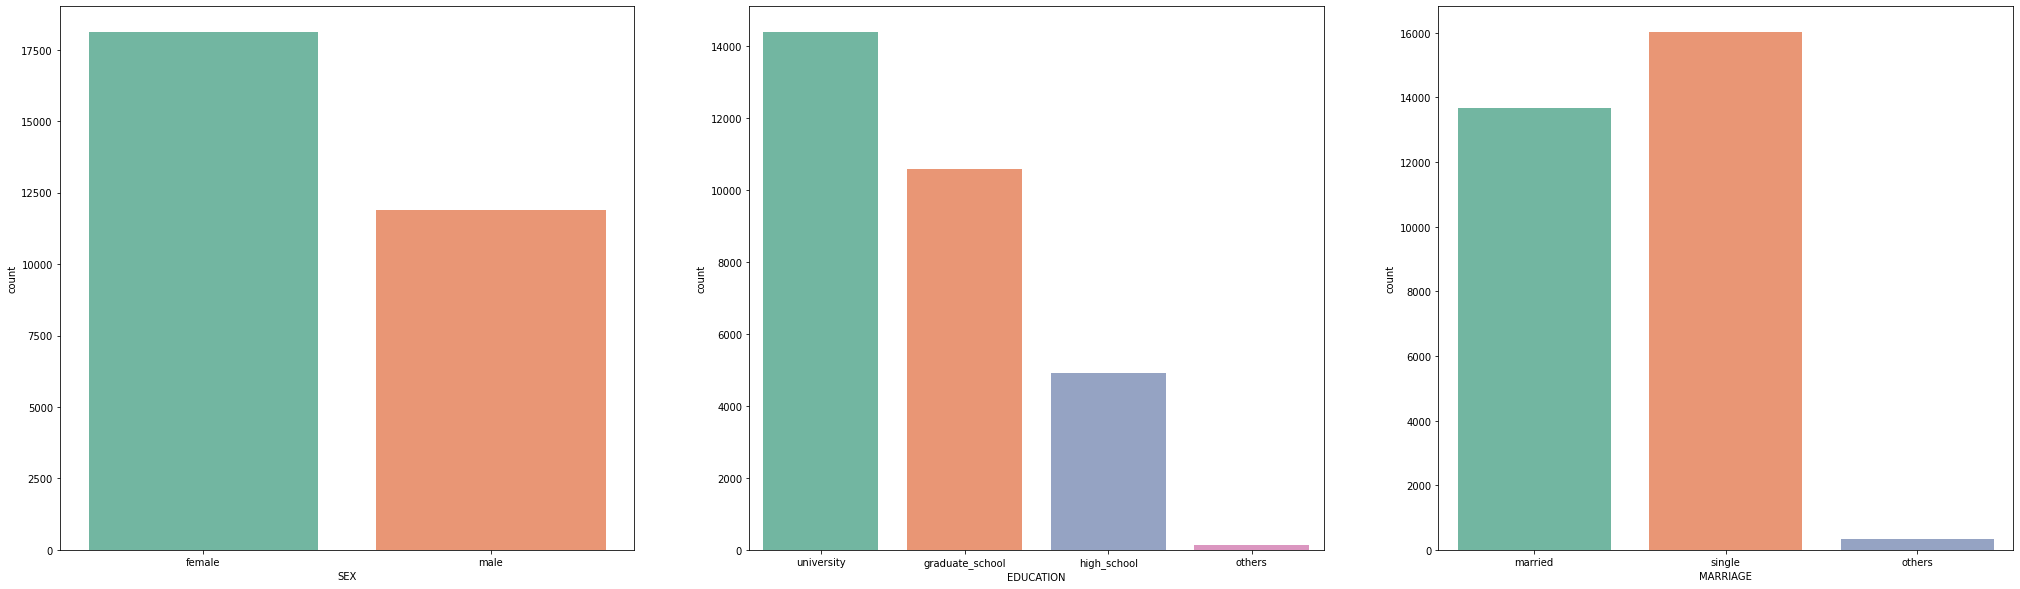

In [27]:
#Univariate Analysis of Categorical features

plt.figure(figsize=(40,15))
fig,ax = plt.subplots(figsize=(35,10))

plt.subplot(1,3,1)
sns.countplot(x ='SEX', data=cred_data, palette="Set2")

plt.subplot(1,3,2)
sns.countplot(x ='EDUCATION', data=cred_data, palette="Set2")

plt.subplot(1,3,3)
sns.countplot(x ='MARRIAGE', data=cred_data, palette="Set2")

###Bivariate Analysis Between Categorical Variables###

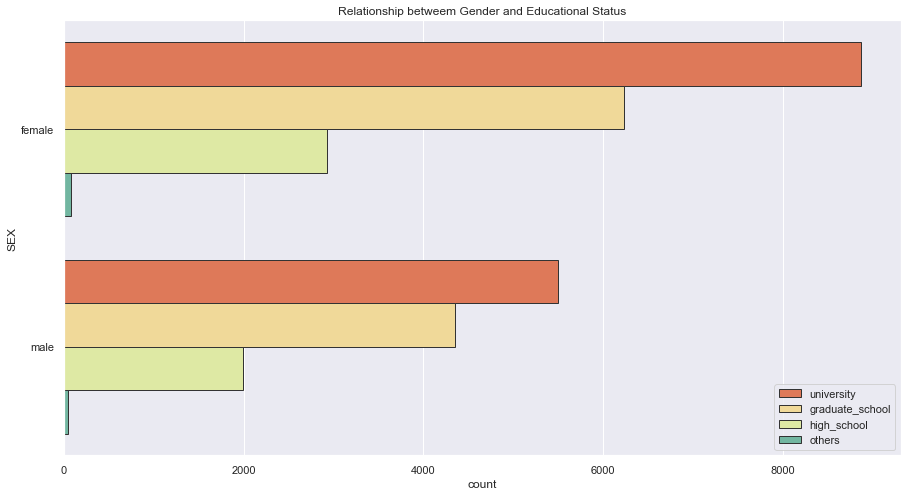

In [28]:
#Relationship between Sex and Educational Status

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(y='SEX', hue='EDUCATION', data=cred_data, palette='Spectral', edgecolor='.2')
plt.title("Relationship betweem Gender and Educational Status")
plt.legend()
plt.show()

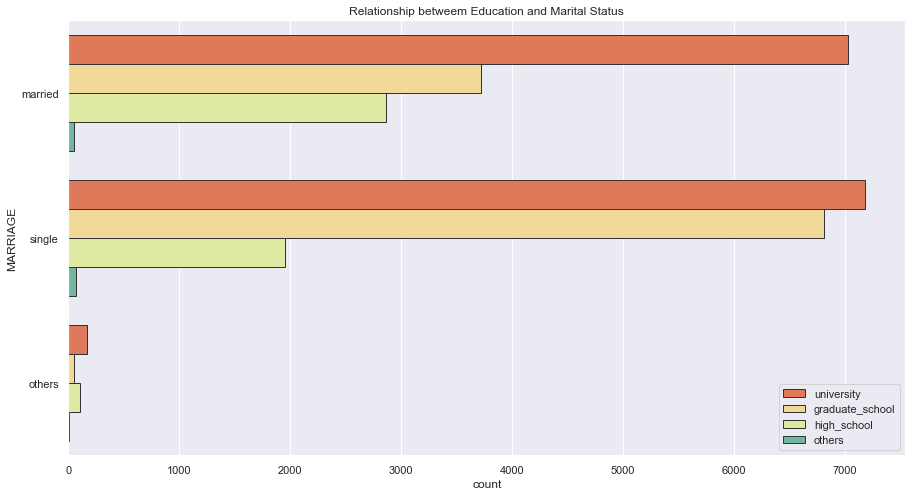

In [29]:
#Relationship between Education and Marital Status

sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(y='MARRIAGE', hue='EDUCATION', data=cred_data, palette='Spectral', edgecolor='.2')
plt.title("Relationship betweem Education and Marital Status")
plt.legend()
plt.show()

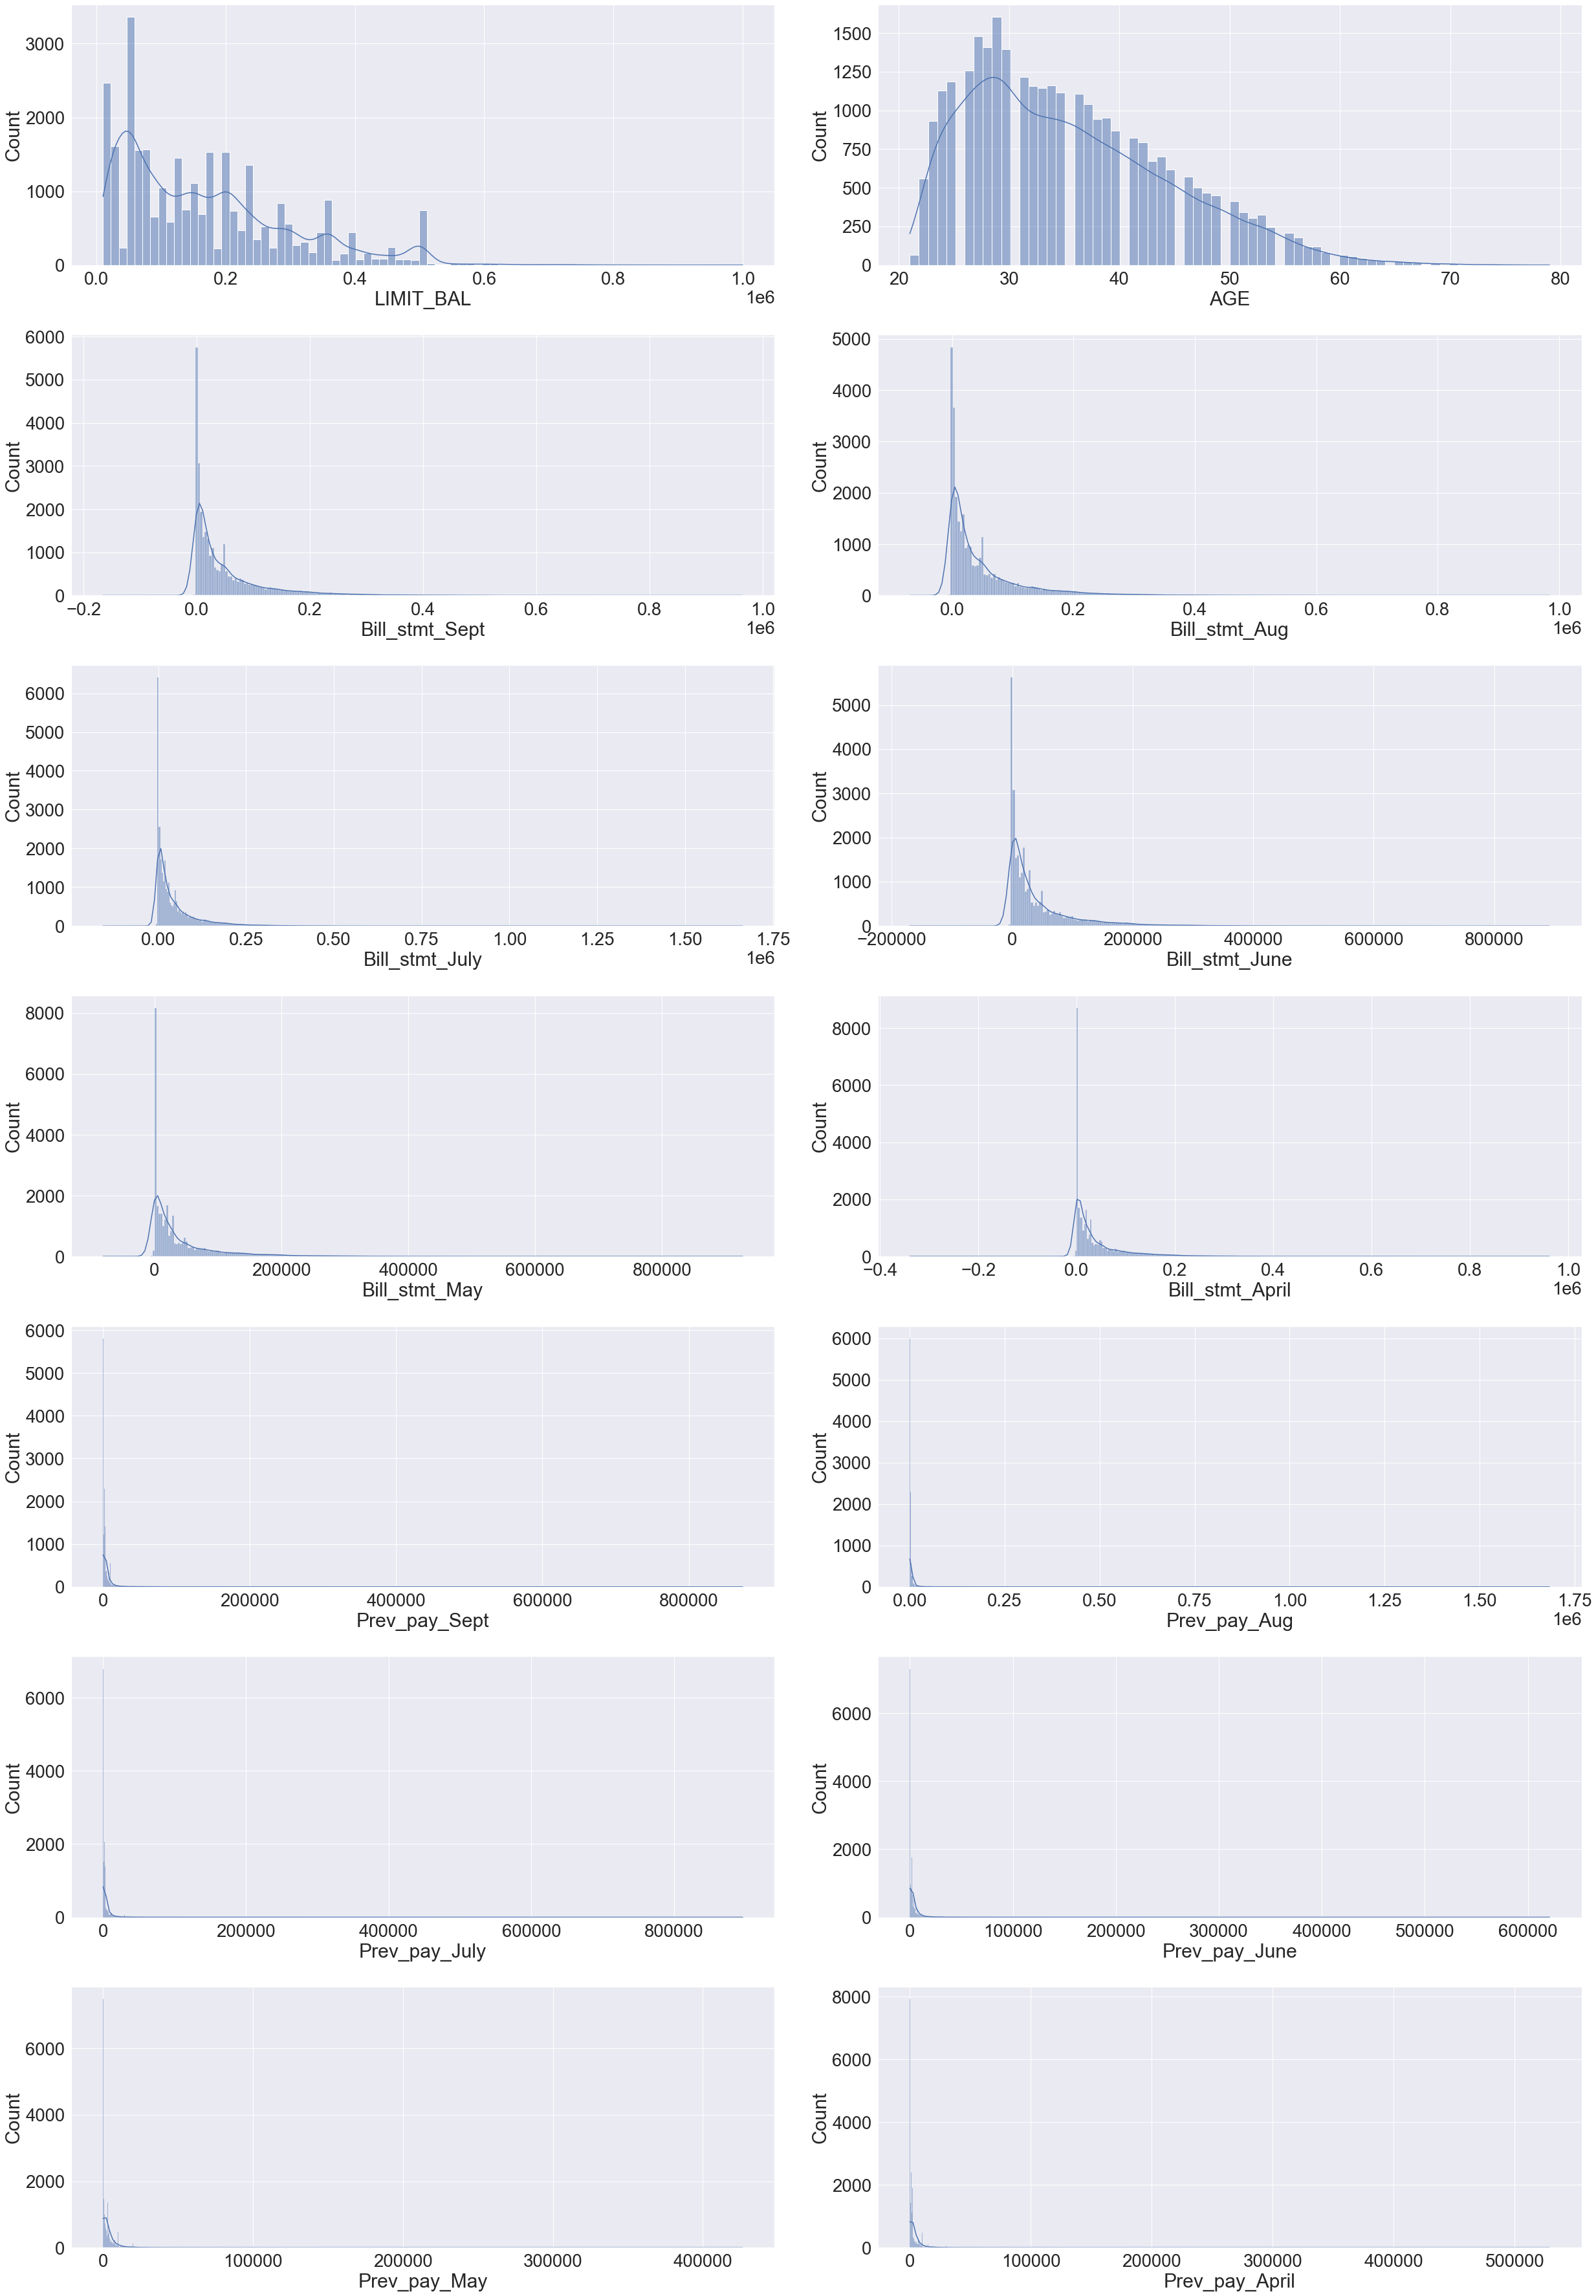

In [30]:
#Univariate Analysis of Numerical Features
sns.set(rc = {'figure.figsize': (35,50)}, font_scale=2.5)
i = 1
for col in cred_data[num_cols]:
    plt.subplot(7,2,i)
    sns.histplot(data = cred_data, x = col, kde = True)
    i = i+1
plt.tight_layout()
plt.show()

<Figure size 1080x432 with 0 Axes>

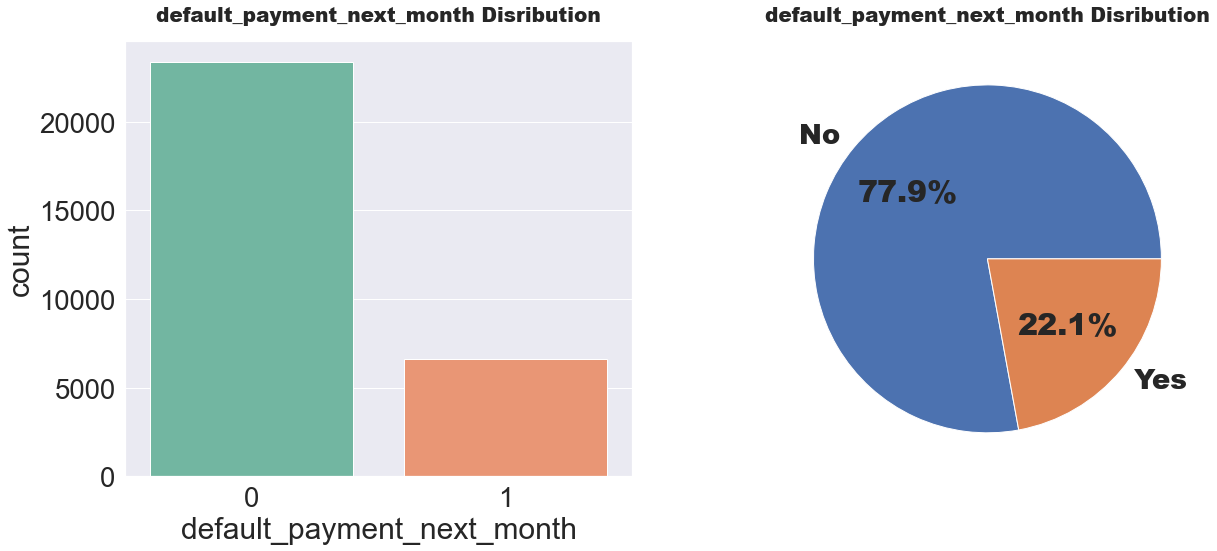

In [31]:
#Univariate Analysis of Target Variable
count = cred_data.default_payment_next_month.value_counts()
labels = 'No', 'Yes'

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x ='default_payment_next_month', data=cred_data, palette="Set2")
plt.title("default_payment_next_month Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("default_payment_next_month Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [32]:
#Bi-variate Analysis w.r.t Target
def bivariate_cat(data,col1,col2,rot):
    cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum()*100, axis=1).round(2)
    ct_exit = cross_tab[1].sort_values(ascending=False)
    ct_exit.plot.bar(figsize=(20,8))
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of default_payment_next_month'.format(col1))
    plt.title('{} Vs default_payment_next_month'.format(col1))
    plt.xticks(rotation=rot)
    plt.show()
    return ct_exit

In [33]:
sns.set(rc = {'figure.figsize': (12,5)}, font_scale=1.5)

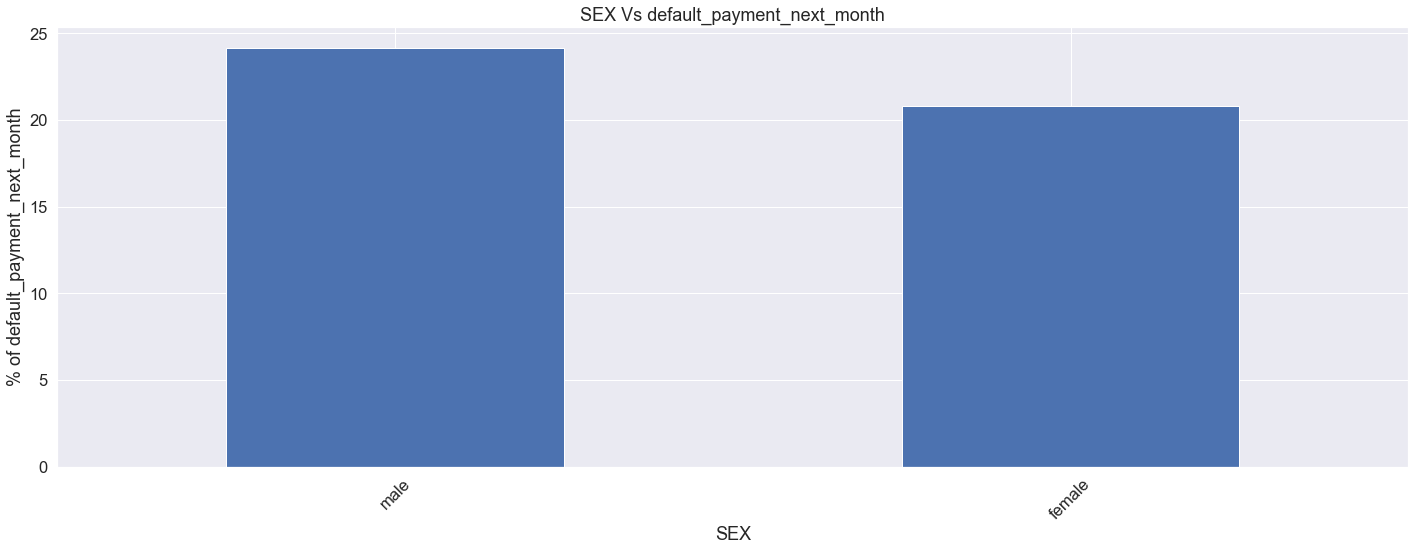

SEX
male      24.17
female    20.78
Name: 1, dtype: float64

In [34]:
plt.rcParams["figure.autolayout"] = True
bivariate_cat(cred_data, 'SEX', 'default_payment_next_month', 45)

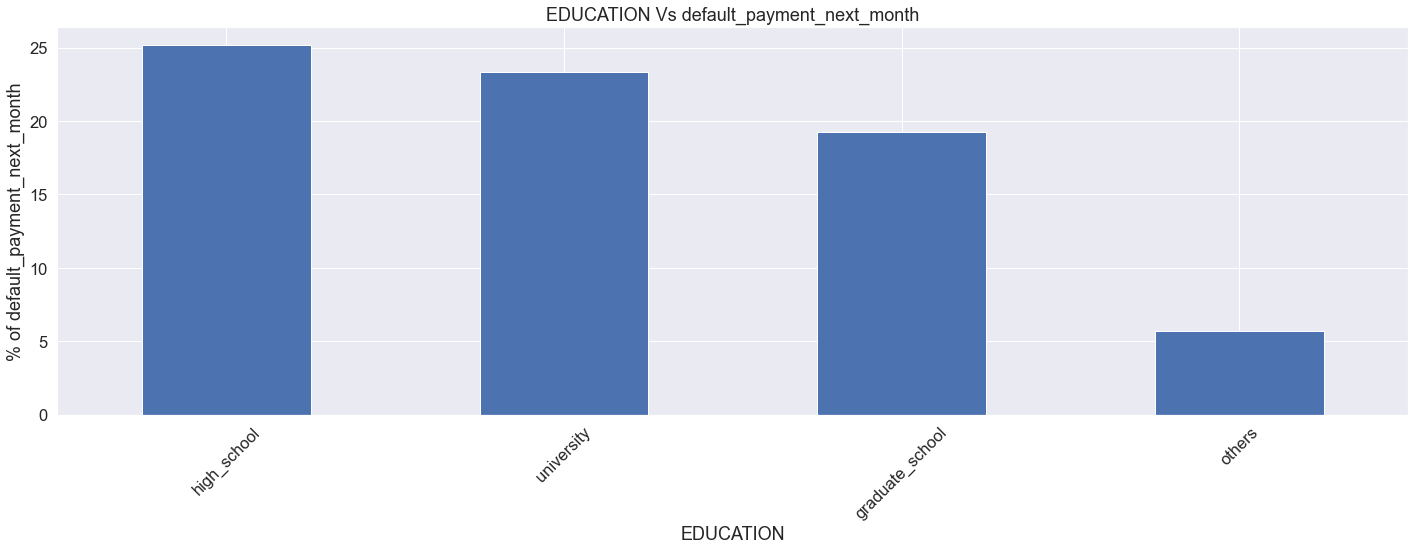

EDUCATION
high_school        25.16
university         23.35
graduate_school    19.23
others              5.69
Name: 1, dtype: float64

In [35]:
bivariate_cat(cred_data, 'EDUCATION', 'default_payment_next_month', 45)

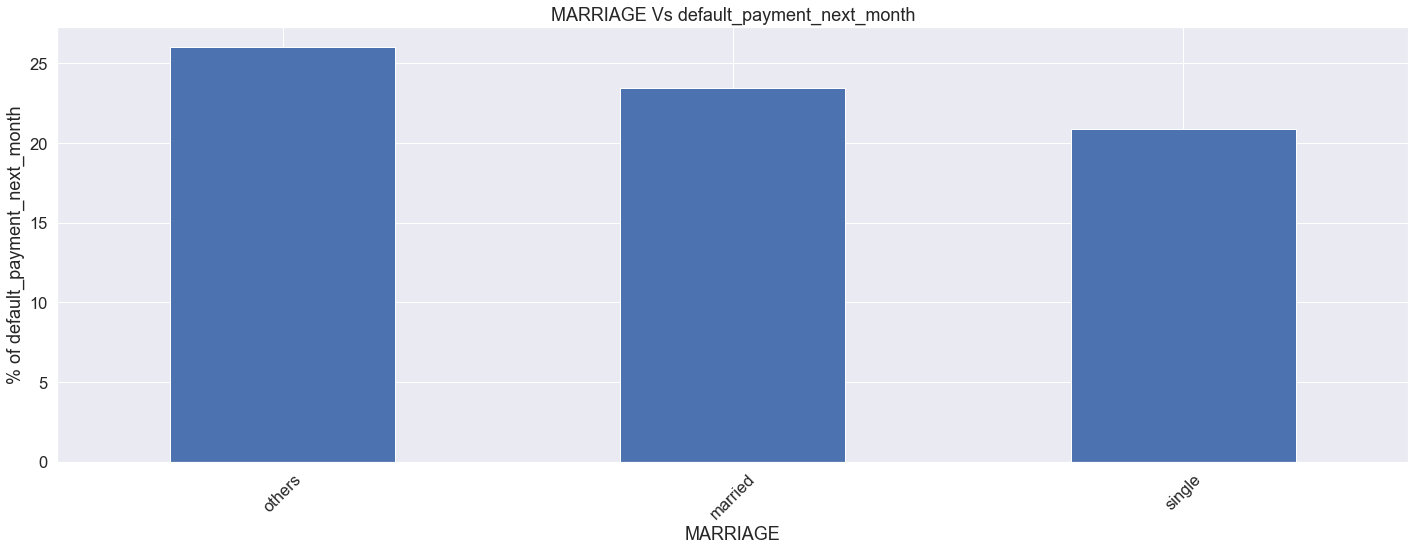

MARRIAGE
others     26.01
married    23.47
single     20.89
Name: 1, dtype: float64

In [36]:
bivariate_cat(cred_data, 'MARRIAGE', 'default_payment_next_month', 45)

In [37]:
min(cred_data['AGE']), max(cred_data['AGE'])

(21, 79)

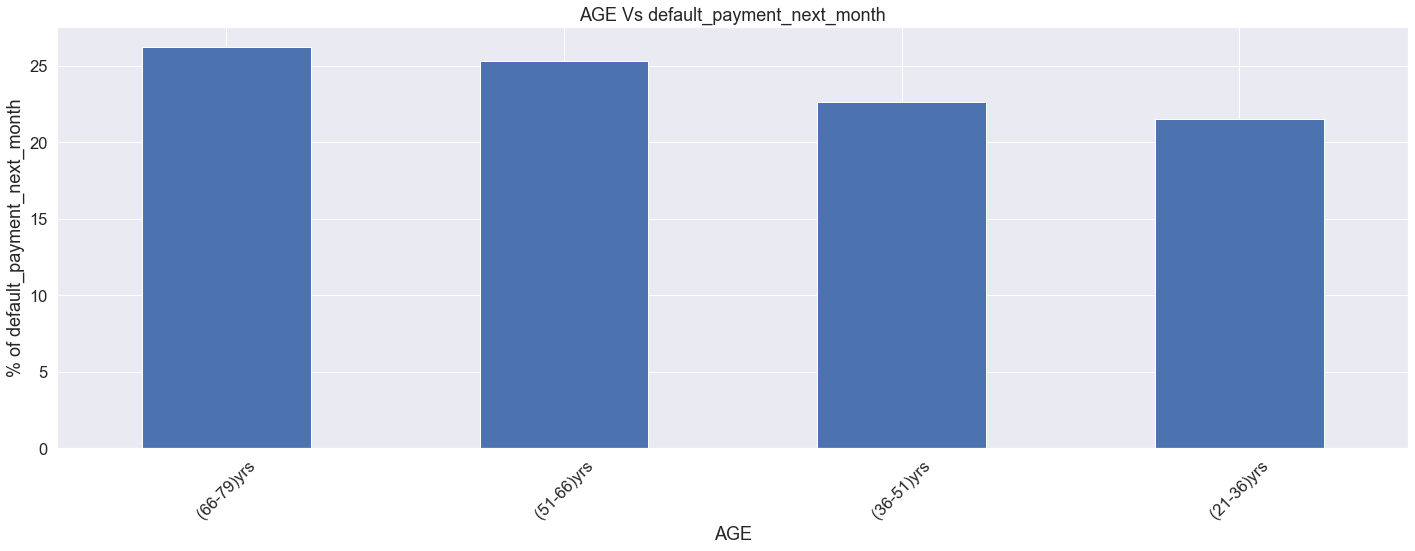

AGE
(66-79)yrs    26.23
(51-66)yrs    25.32
(36-51)yrs    22.61
(21-36)yrs    21.49
Name: 1, dtype: float64

In [38]:
#bin Age
cred_data['AGE'] = pd.cut(cred_data.AGE.to_list(), bins=[21,36,51,66,79], labels=['(21-36)yrs','(36-51)yrs','(51-66)yrs','(66-79)yrs'], include_lowest=True)
bivariate_cat(cred_data, 'AGE', 'default_payment_next_month', 45)

In [39]:
cat_cols.extend(['AGE'])
cred_data[cat_cols] = cred_data[cat_cols].astype("category")
num_cols.remove('AGE')

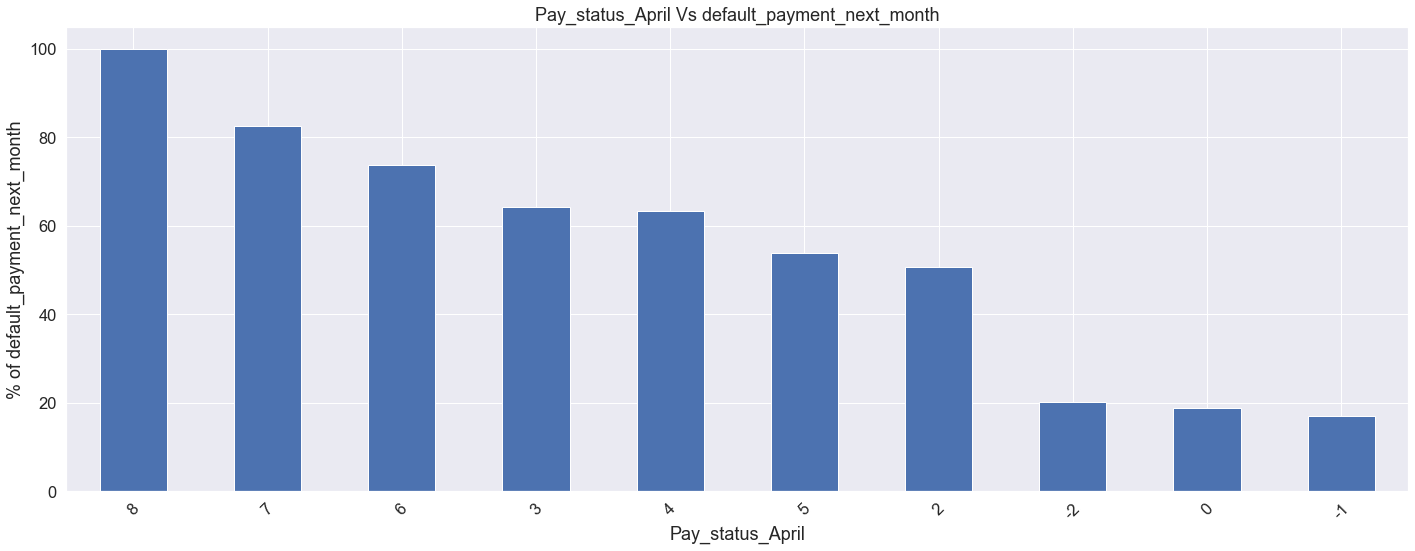

Pay_status_April
8     100.00
7      82.61
6      73.68
3      64.13
4      63.27
5      53.85
2      50.65
-2     20.04
0      18.84
-1     16.99
Name: 1, dtype: float64

In [40]:
bivariate_cat(cred_data, 'Pay_status_April', 'default_payment_next_month', 45)

If the payment-dues for the month of April is >= 7 months then there will be default payment next month.

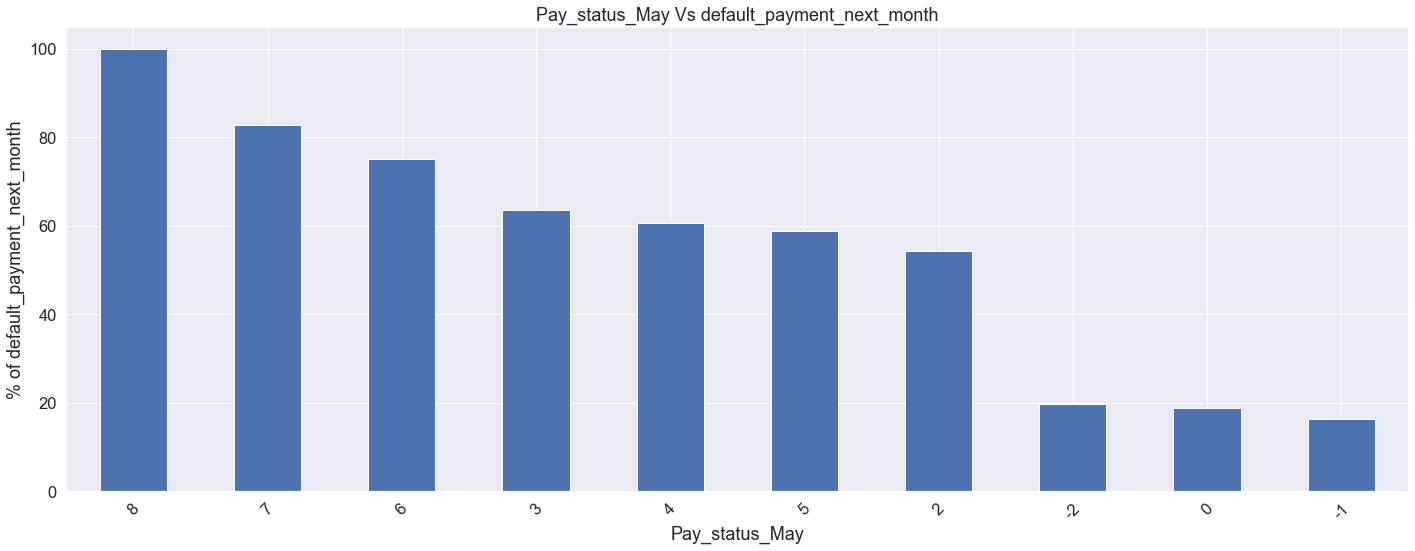

Pay_status_May
8     100.00
7      82.76
6      75.00
3      63.48
4      60.71
5      58.82
2      54.19
-2     19.69
0      18.85
-1     16.19
Name: 1, dtype: float64

In [41]:
bivariate_cat(cred_data, 'Pay_status_May', 'default_payment_next_month', 45)

If the payment-dues for the month of May is >= 7 months then there will be default payment next month.

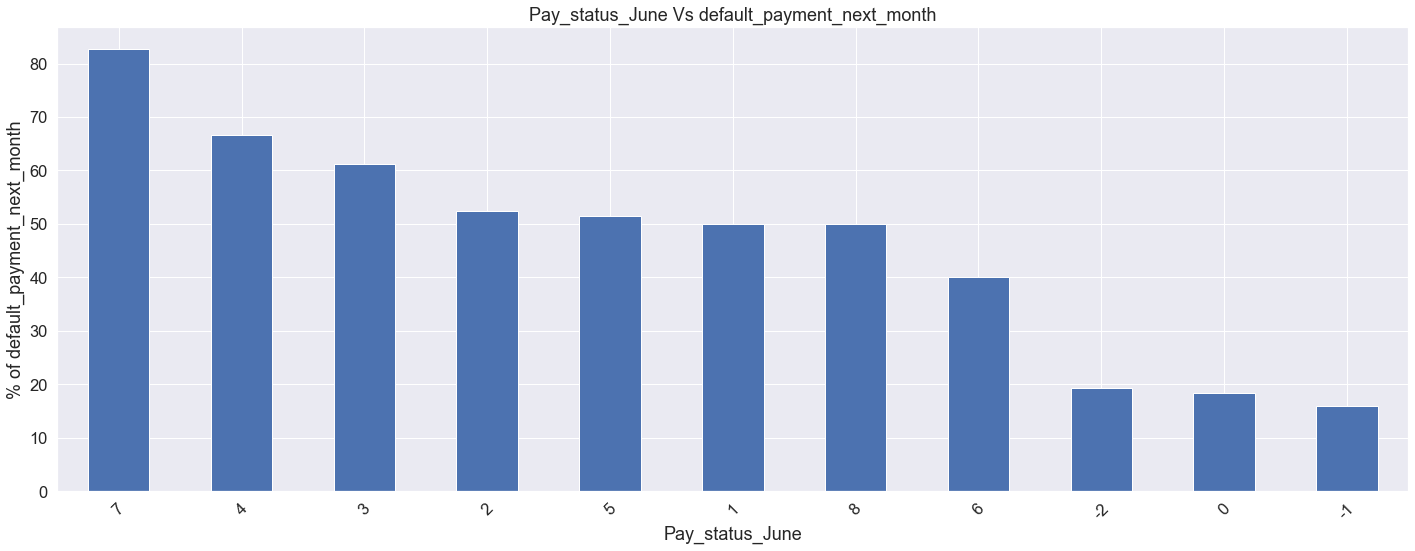

Pay_status_June
7     82.76
4     66.67
3     61.11
2     52.33
5     51.43
1     50.00
8     50.00
6     40.00
-2    19.25
0     18.33
-1    15.90
Name: 1, dtype: float64

In [42]:
bivariate_cat(cred_data, 'Pay_status_June', 'default_payment_next_month', 45)

If the payment-dues for the month of June is >= 7 months then there will be default payment next month.

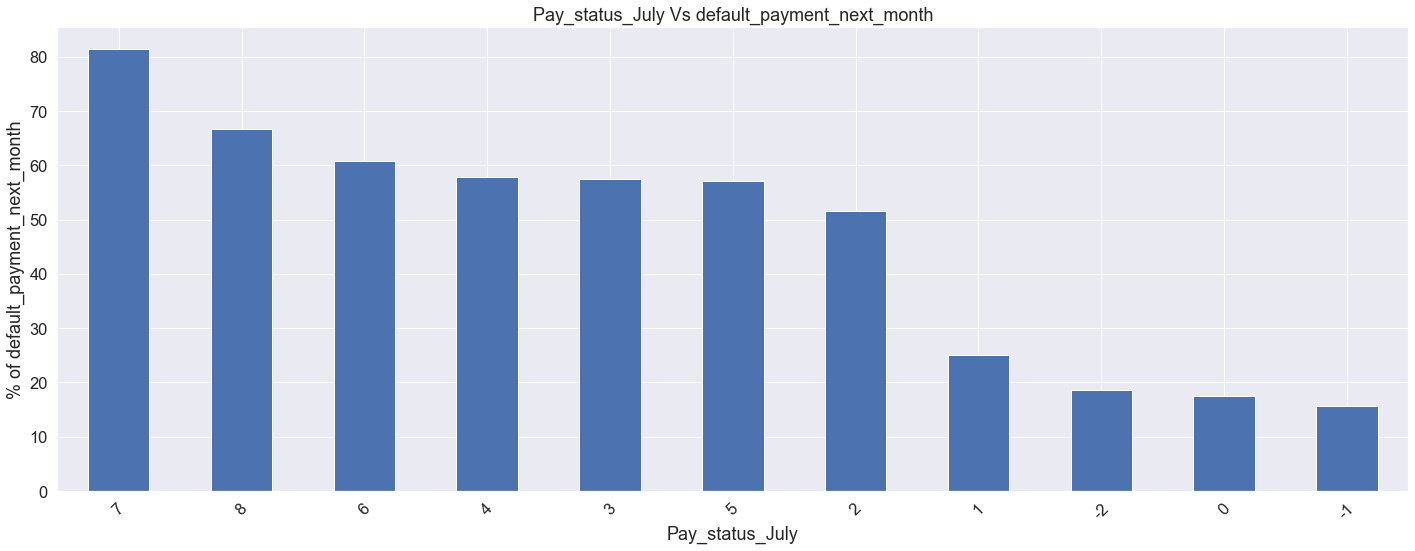

Pay_status_July
7     81.48
8     66.67
6     60.87
4     57.89
3     57.50
5     57.14
2     51.56
1     25.00
-2    18.53
0     17.45
-1    15.59
Name: 1, dtype: float64

In [43]:
bivariate_cat(cred_data, 'Pay_status_July', 'default_payment_next_month', 45)

If the payment-dues for the month of July is >= 7 months then there will be default payment next month.

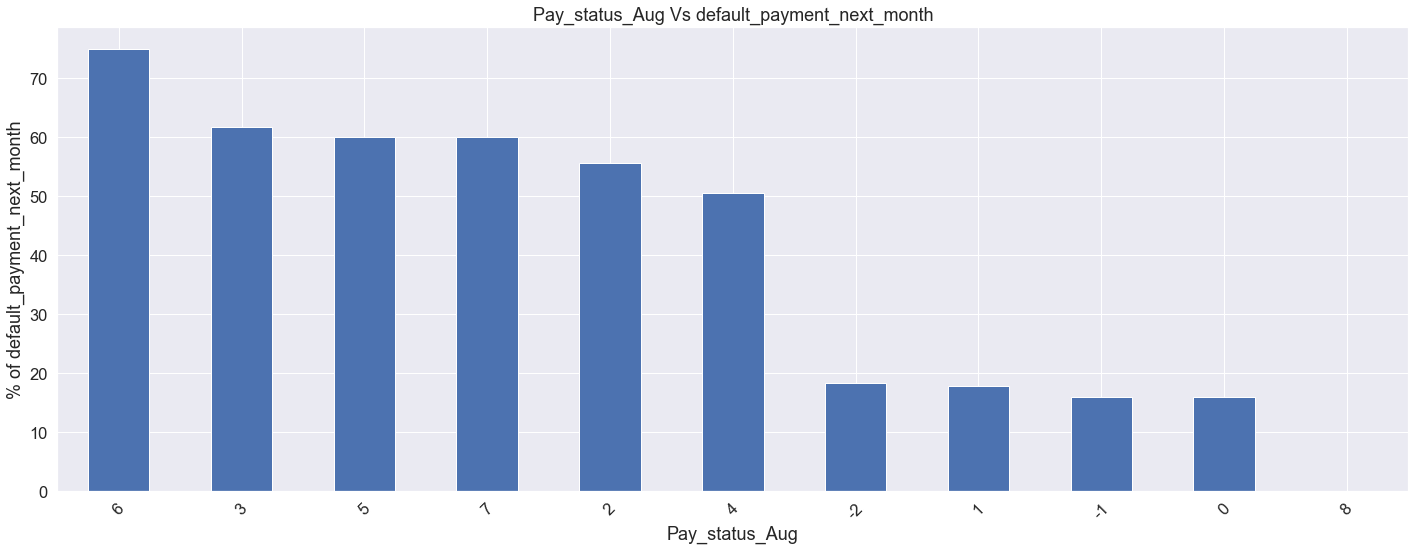

Pay_status_Aug
6     75.00
3     61.66
5     60.00
7     60.00
2     55.61
4     50.51
-2    18.27
1     17.86
-1    15.97
0     15.91
8      0.00
Name: 1, dtype: float64

In [44]:
bivariate_cat(cred_data, 'Pay_status_Aug', 'default_payment_next_month', 45)

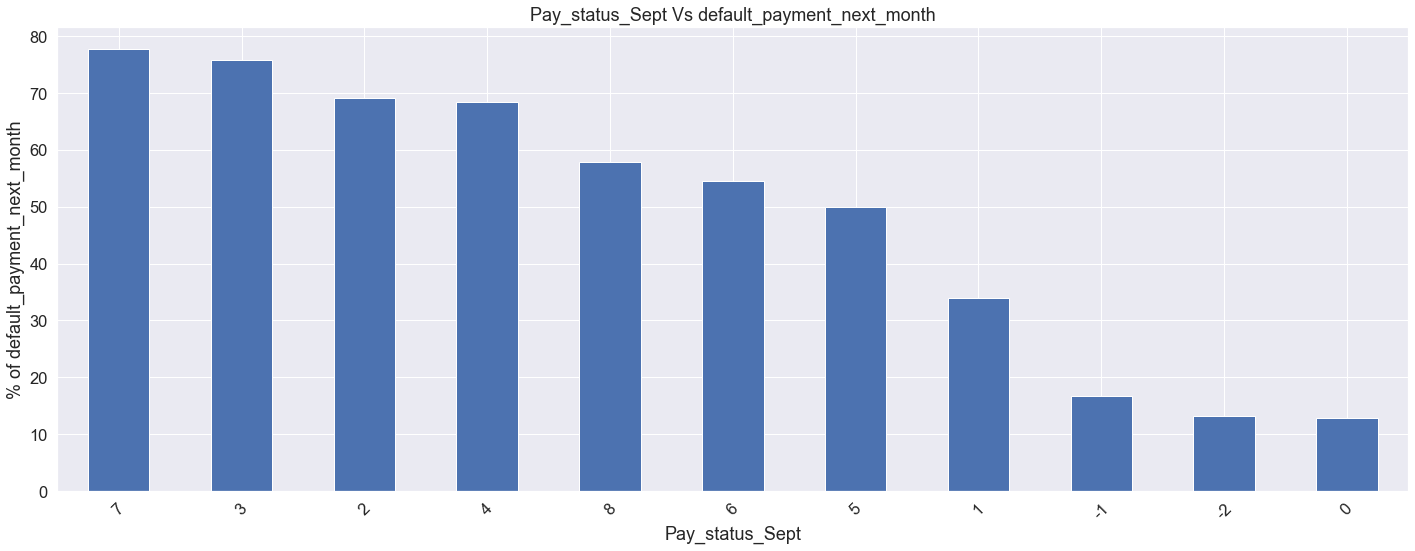

Pay_status_Sept
7     77.78
3     75.78
2     69.14
4     68.42
8     57.89
6     54.55
5     50.00
1     33.95
-1    16.78
-2    13.23
0     12.81
Name: 1, dtype: float64

In [45]:
bivariate_cat(cred_data, 'Pay_status_Sept', 'default_payment_next_month', 45)

In [46]:
sns.set(rc = {'figure.figsize': (12,5)}, font_scale=1.5)

<AxesSubplot:title={'center':'LIMIT_BAL'}, xlabel='default_payment_next_month'>

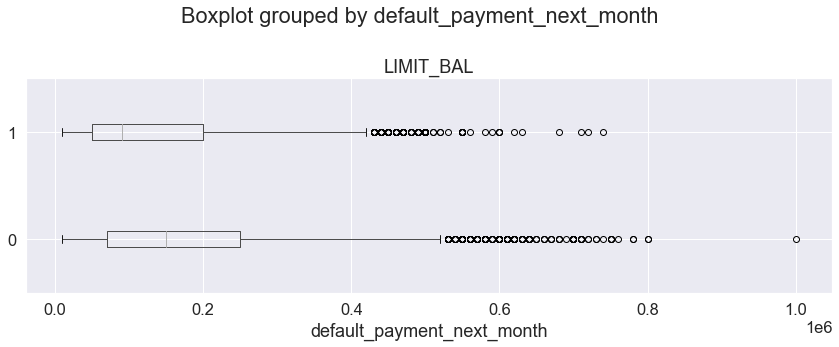

In [47]:
# Relationship between LIMIT_BAL Vs default_payment_next_month
cred_data.boxplot(column='LIMIT_BAL', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Bill_stmt_April'}, xlabel='default_payment_next_month'>

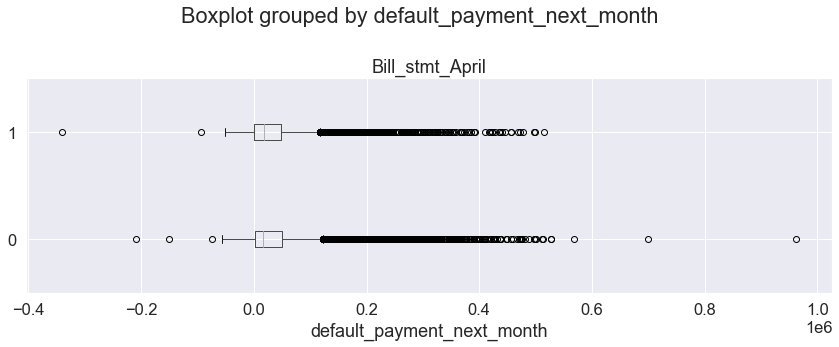

In [48]:
# Relationship between Bill_stmt_April Vs default_payment_next_month
cred_data.boxplot(column='Bill_stmt_April', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Bill_stmt_May'}, xlabel='default_payment_next_month'>

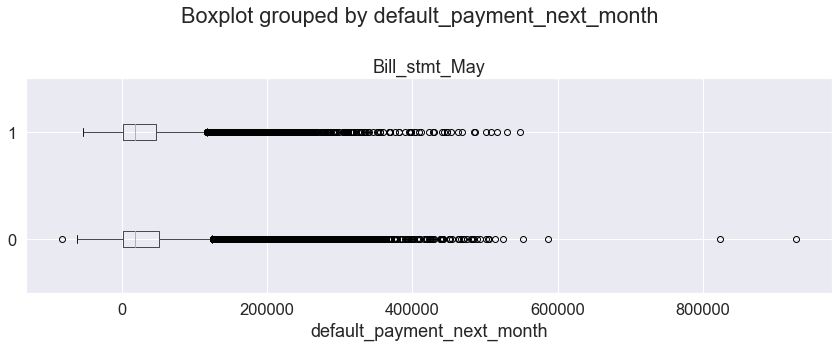

In [49]:
# Relationship between Bill_stmt_May Vs default_payment_next_month
cred_data.boxplot(column='Bill_stmt_May', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Bill_stmt_June'}, xlabel='default_payment_next_month'>

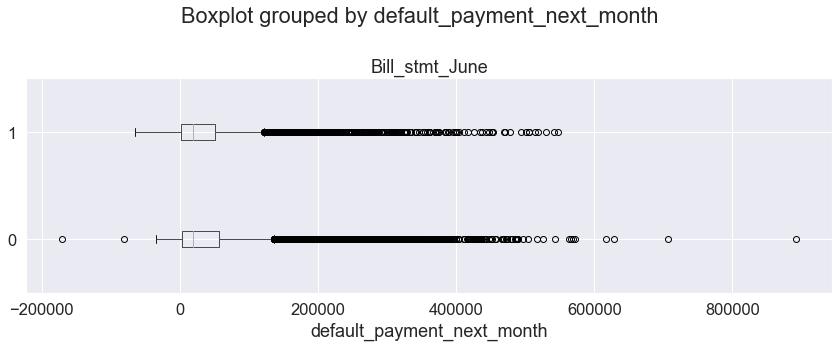

In [50]:
# Relationship between Bill_stmt_June Vs default_payment_next_month
cred_data.boxplot(column='Bill_stmt_June', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Bill_stmt_July'}, xlabel='default_payment_next_month'>

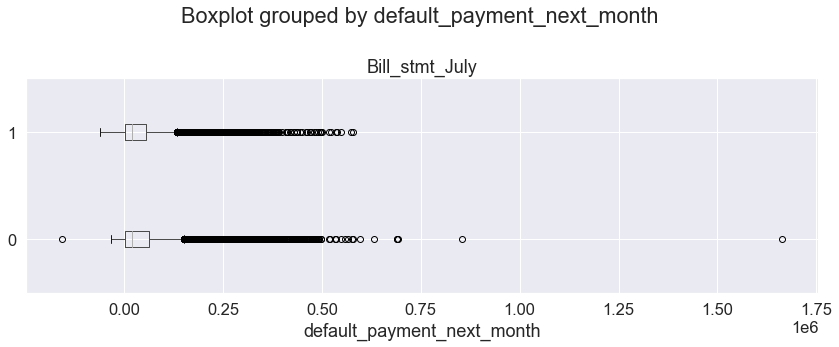

In [51]:
# Relationship between Bill_stmt_July Vs default_payment_next_month
cred_data.boxplot(column='Bill_stmt_July', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Bill_stmt_Aug'}, xlabel='default_payment_next_month'>

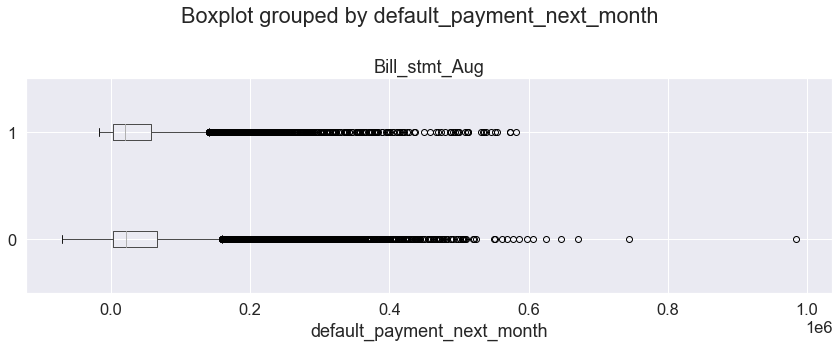

In [52]:
# Relationship between Bill_stmt_August Vs default_payment_next_month
cred_data.boxplot(column='Bill_stmt_Aug', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Bill_stmt_Sept'}, xlabel='default_payment_next_month'>

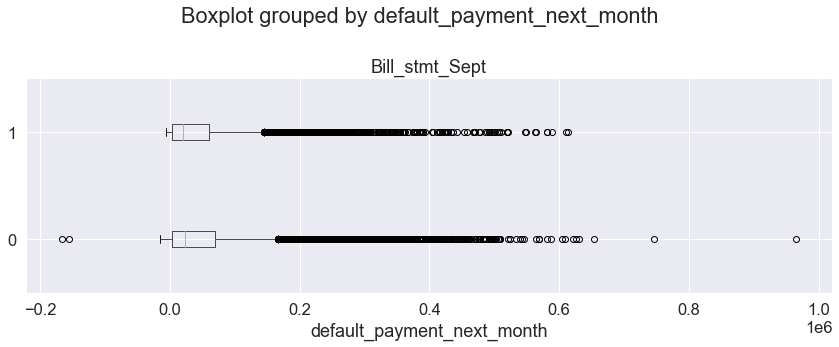

In [53]:
# Relationship between Bill_stmt_Sept Vs default_payment_next_month
cred_data.boxplot(column='Bill_stmt_Sept', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Prev_pay_April'}, xlabel='default_payment_next_month'>

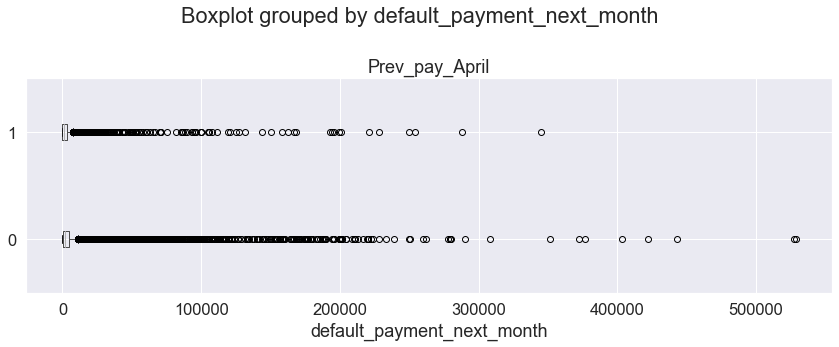

In [54]:
# Relationship between Prev_pay_April Vs default_payment_next_month
cred_data.boxplot(column='Prev_pay_April', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Prev_pay_May'}, xlabel='default_payment_next_month'>

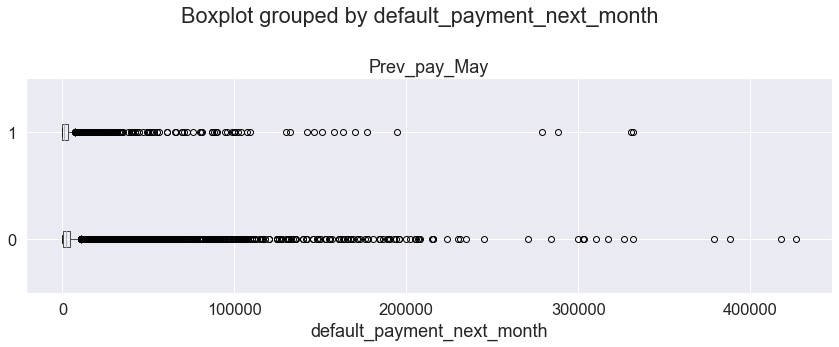

In [55]:
# Relationship between Prev_pay_May Vs default_payment_next_month
cred_data.boxplot(column='Prev_pay_May', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Prev_pay_June'}, xlabel='default_payment_next_month'>

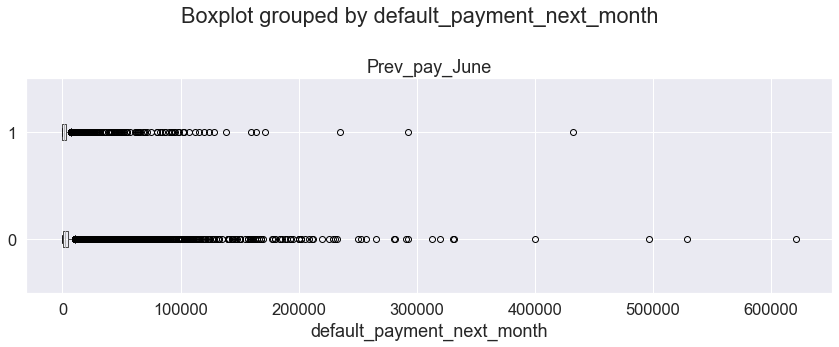

In [56]:
# Relationship between Prev_pay_June Vs default_payment_next_month
cred_data.boxplot(column='Prev_pay_June', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Prev_pay_July'}, xlabel='default_payment_next_month'>

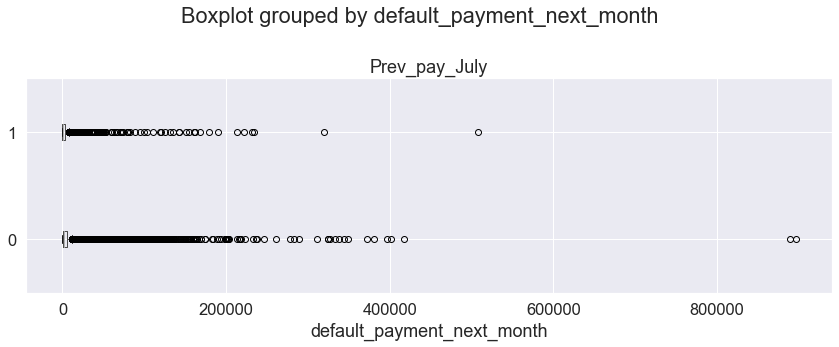

In [57]:
# Relationship between Prev_pay_July Vs default_payment_next_month
cred_data.boxplot(column='Prev_pay_July', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Prev_pay_Aug'}, xlabel='default_payment_next_month'>

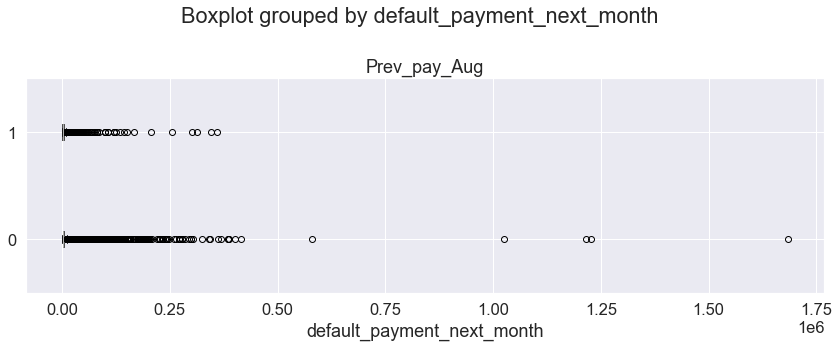

In [58]:
# Relationship between Prev_pay_Aug Vs default_payment_next_month
cred_data.boxplot(column='Prev_pay_Aug', by='default_payment_next_month', figsize=(12,5), vert=False)

<AxesSubplot:title={'center':'Prev_pay_Sept'}, xlabel='default_payment_next_month'>

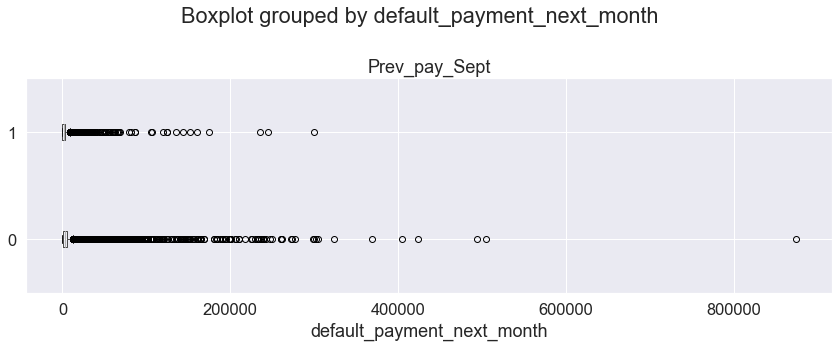

In [59]:
# Relationship between Prev_pay_Sept Vs default_payment_next_month
cred_data.boxplot(column='Prev_pay_Sept', by='default_payment_next_month', figsize=(12,5), vert=False)

In [60]:
cred_data.corr()

,LIMIT_BAL,Bill_stmt_Sept,Bill_stmt_Aug,Bill_stmt_July,Bill_stmt_June,Bill_stmt_May,Bill_stmt_April,Prev_pay_Sept,Prev_pay_Aug,Prev_pay_July,Prev_pay_June,Prev_pay_May,Prev_pay_April
LIMIT_BAL,1.000000,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
Bill_stmt_Sept,0.285430,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
Bill_stmt_Aug,0.278314,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
Bill_stmt_July,0.283236,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
Bill_stmt_June,0.293988,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
Bill_stmt_May,0.295562,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
Bill_stmt_April,0.290389,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
Prev_pay_Sept,0.195236,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
Prev_pay_Aug,0.178408,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634
Prev_pay_July,0.210167,0.156887,0.150718,0.130011,0.300023,0.252305,0.233770,0.252191,0.244770,1.000000,0.216325,0.159214,0.162740


After checking the most correlating features, lets view the relationship with scatter-plot.

In [61]:
min(cred_data['Bill_stmt_Sept']), max(cred_data['Bill_stmt_Sept'])

(-165580.0, 964511.0)

###Bi-variate Analysis between two Continuous Variables###

<AxesSubplot:xlabel='Bill_stmt_Sept', ylabel='Bill_stmt_Aug'>

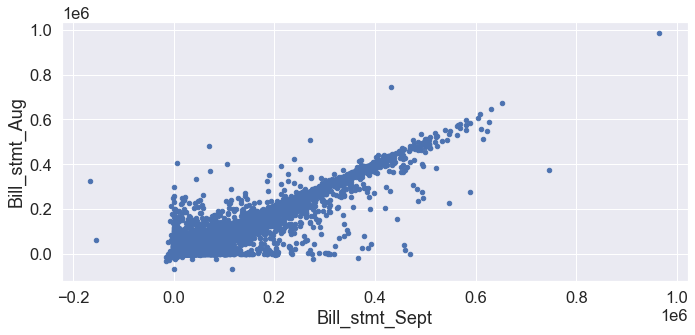

In [62]:
# Relationship between Bill_stmt_Sept Vs Bill_stmt_Aug
cred_data.plot.scatter(x='Bill_stmt_Sept', y='Bill_stmt_Aug', marker='o', figsize=(10,5))

<AxesSubplot:xlabel='Bill_stmt_Sept', ylabel='Bill_stmt_July'>

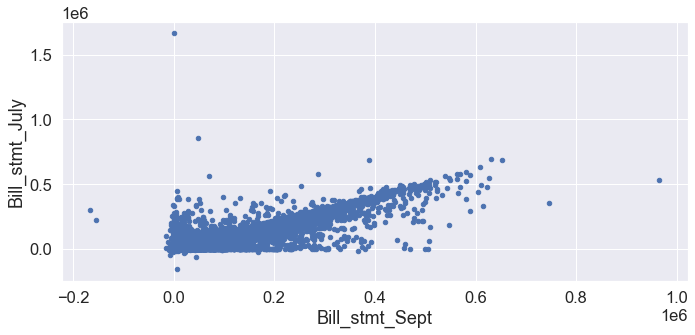

In [63]:
# Relationship between Bill_stmt_Sept Vs Bill_stmt_July
cred_data.plot.scatter(x='Bill_stmt_Sept', y='Bill_stmt_July', marker='o', figsize=(10,5))

<AxesSubplot:xlabel='Bill_stmt_Sept', ylabel='Bill_stmt_June'>

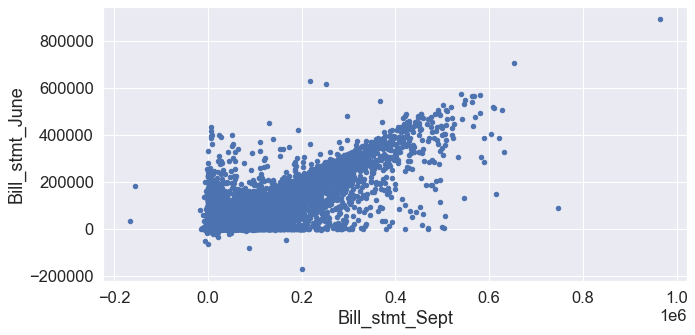

In [64]:
# Relationship between Bill_stmt_Sept Vs Bill_stmt_June
cred_data.plot.scatter(x='Bill_stmt_Sept', y='Bill_stmt_June', marker='o', figsize=(10,5))

<AxesSubplot:xlabel='Bill_stmt_Sept', ylabel='Bill_stmt_May'>

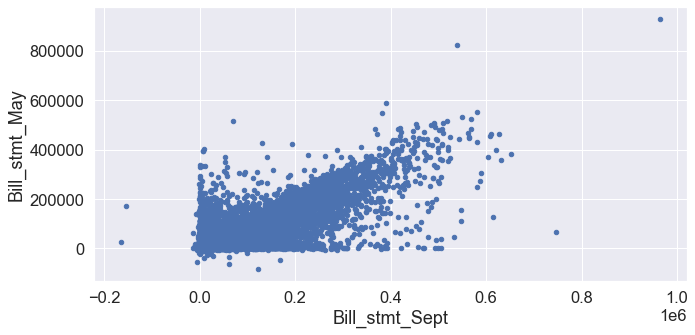

In [65]:
# Relationship between Bill_stmt_Sept Vs Bill_stmt_May
cred_data.plot.scatter(x='Bill_stmt_Sept', y='Bill_stmt_May', marker='o', figsize=(10,5))

<AxesSubplot:xlabel='Bill_stmt_Sept', ylabel='Bill_stmt_April'>

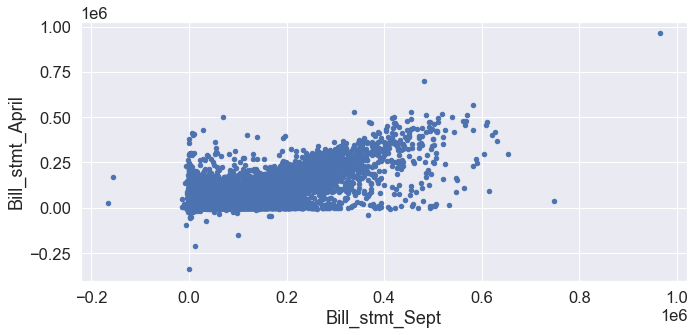

In [66]:
# Relationship between Bill_stmt_Sept Vs Bill_stmt_April
cred_data.plot.scatter(x='Bill_stmt_Sept', y='Bill_stmt_April', marker='o', figsize=(10,5))

Since the Bill Statements age generated cumulatively for each month and depends on previous transactions, there is his collinearity to be obsereved. Let's drop this columns from further considerations.

In [67]:
cred_data.drop(['Bill_stmt_Aug', 'Bill_stmt_July', 'Bill_stmt_June', 'Bill_stmt_May', 'Bill_stmt_April'], axis =1, inplace=True)

In [68]:
#creating a copy of the data
cred_data_copy = cred_data.copy()

In [69]:
cat_cols

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'Pay_status_Sept',
 'Pay_status_Aug',
 'Pay_status_July',
 'Pay_status_June',
 'Pay_status_May',
 'Pay_status_April',
 'default_payment_next_month',
 'AGE']

In [70]:
#scaling up features
from sklearn.preprocessing import LabelEncoder

#target column
tgt_col = ['default_payment_next_month']

#categorical columns
category_names = cred_data.nunique()[cred_data.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

#numerical columns
num_cols = [i for i in cred_data.columns if i not in category_names+tgt_col]

#binary columns
bin_cols = cred_data.nunique()[cred_data.nunique()==2].keys().tolist()

#multi-columns
multi_cols = [i for i in category_names if i not in bin_cols]

#Label Encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    cred_data[i] = le.fit_transform(cred_data[i])

#duplicating cols for multi-value columns
cred_data = pd.get_dummies(data=cred_data, columns=multi_cols)

In [71]:
#Normalising Numerical columns
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
cred_data[num_cols] = minmax.fit_transform(cred_data[num_cols].values)

In [72]:
# K-Fold Cross-Validation

from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv= range(1,61)):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=_scoring, return_train_score=True)
    return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [73]:
# Grouped Bar Chart for both training and validation data

def plot_result(x_label, y_label, plot_title, train_data, val_data, rot):
    
    # Set size of plot
    plt.figure(figsize=(40,15))
    labels = ["1st fold", "2nd fold", "3rd fold", "4th fold", "5th fold", "6th fold", "7th fold", "8th fold", "9th fold", "10th fold",
              "11th fold", "12th fold", "13th fold", "14th fold", "15th fold", "16th fold", "17th fold", "18th fold", "19th fold", "20th fold",
              "21th Fold", "22th Fold", "23th Fold", "24th Fold", "25th Fold", "26th Fold", "27th Fold", "28th Fold", "29th Fold", "30th Fold",
              "31st Fold", "32nd Fold", "33rd Fold", "34th Fold", "35th Fold", "36th Fold", "37th Fold", "38th Fold", "39th Fold", "40th Fold",
              "41st Fold", "42nd Fold", "43rd Fold", "44th Fold", "45th Fold", "46th Fold", "47th Fold", "48th Fold", "49th Fold", "50th Fold",
             "51st Fold", "52nd Fold", "53rd Fold", "54th Fold", "55th Fold", "56th Fold", "57th Fold", "58th Fold", "59th Fold", "60th Fold"]
   
    X_axis = np.arange(len(labels))
    ax = plt.gca()
    plt.ylim(0.40000, 1)
    plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
    plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
    plt.title(plot_title, fontsize=30) 
    plt.xticks(X_axis, labels, fontsize=20)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.xticks(rotation=rot)
    plt.legend()
    plt.grid(True)
    plt.show()

In [74]:
#Model training

cols = [i for i in cred_data.columns if i not  in tgt_col]
X = cred_data[cols]
Y = cred_data[tgt_col]

#train-test-validation split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X_train, Y_train, 60)
print(decision_tree_result)

{'Training Accuracy scores': array([0.99677966, 0.99677966, 0.99677966, 0.99677966, 0.99669492,
       0.99673729, 0.99682203, 0.99673729, 0.99673729, 0.99682203,
       0.99686441, 0.99677966, 0.99673729, 0.99686441, 0.99669492,
       0.99686441, 0.99669492, 0.99682203, 0.99673729, 0.99677966,
       0.99669492, 0.99669492, 0.99669492, 0.99673729, 0.99682203,
       0.99682203, 0.99677966, 0.99686441, 0.99677966, 0.99673729,
       0.99682203, 0.99673729, 0.99686441, 0.99677966, 0.99677966,
       0.99677966, 0.99673729, 0.99673729, 0.99677966, 0.99677966,
       0.99686441, 0.99673729, 0.99677966, 0.99673729, 0.99669492,
       0.99677966, 0.99673729, 0.99673729, 0.99673729, 0.99673729,
       0.99694915, 0.99682203, 0.99682203, 0.99673729, 0.99677966,
       0.99673729, 0.99677966, 0.99682203, 0.99682203, 0.99682203]), 'Mean Training Accuracy': 99.67761299435028, 'Training Precision scores': array([0.99786656, 0.99786656, 0.99786656, 0.99864025, 0.99786574,
       0.99767307, 0.998

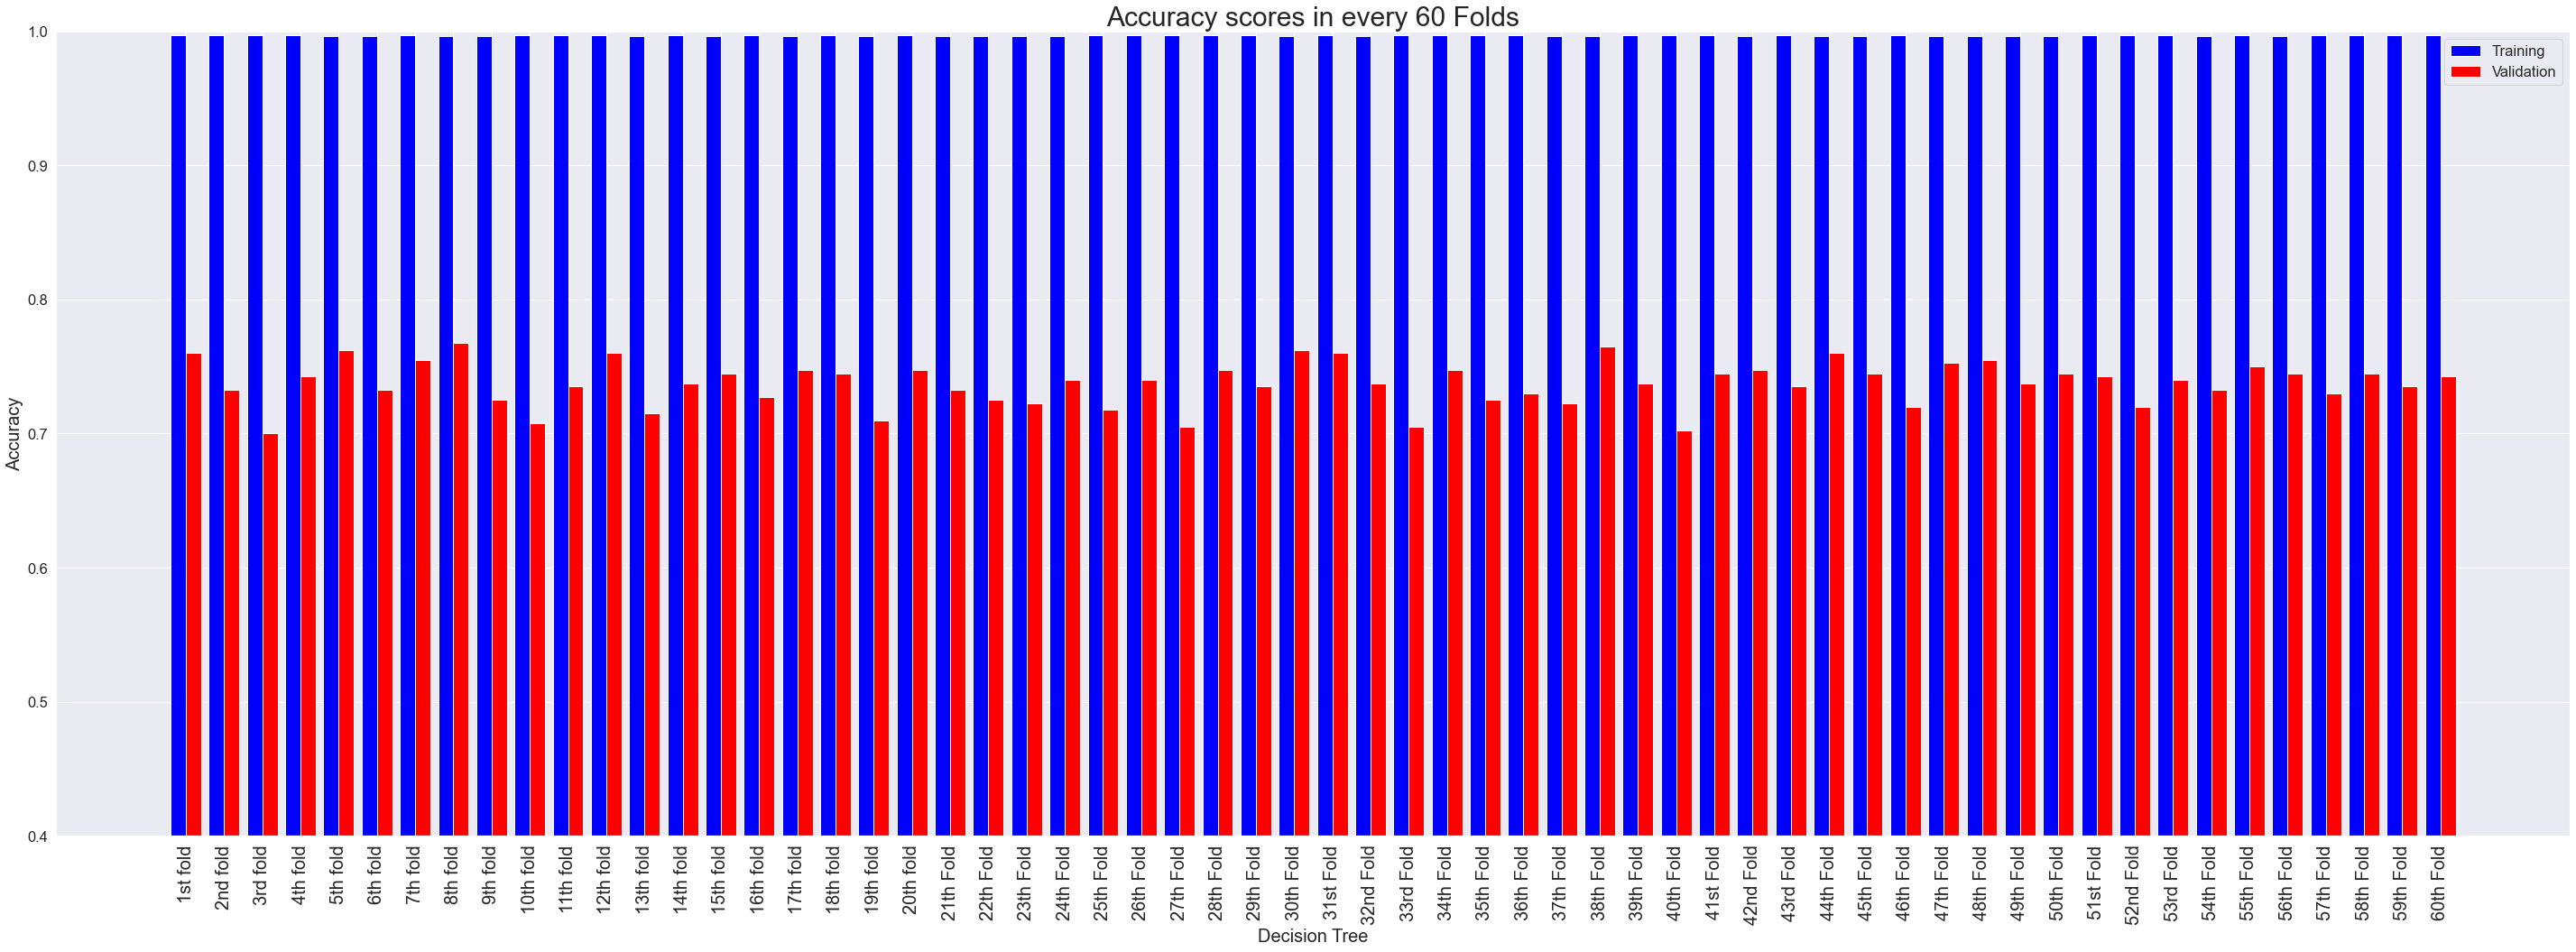

In [75]:
# Plot Accuracy Result
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in every 60 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"], 90)

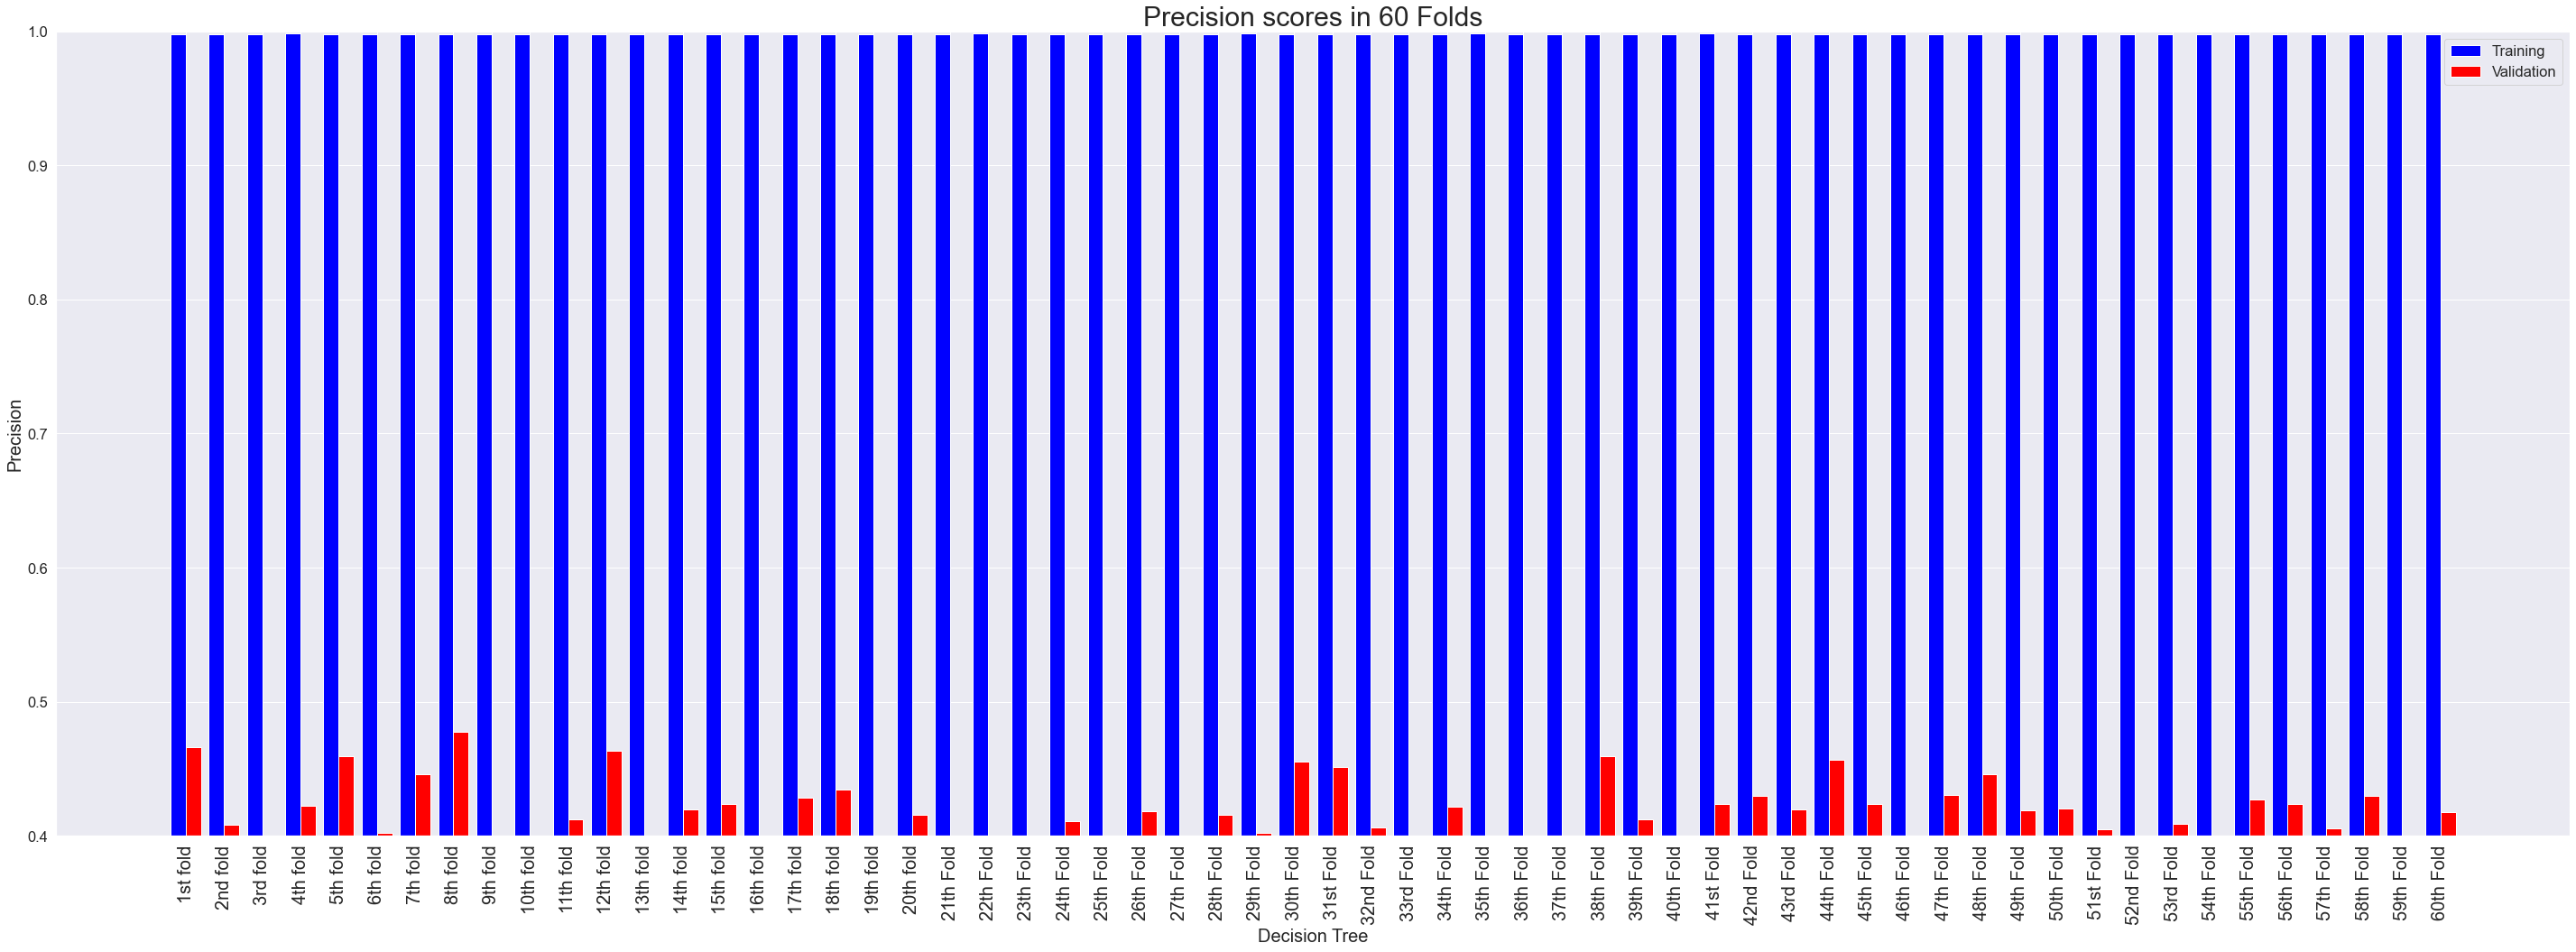

In [76]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 60 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"], 90)

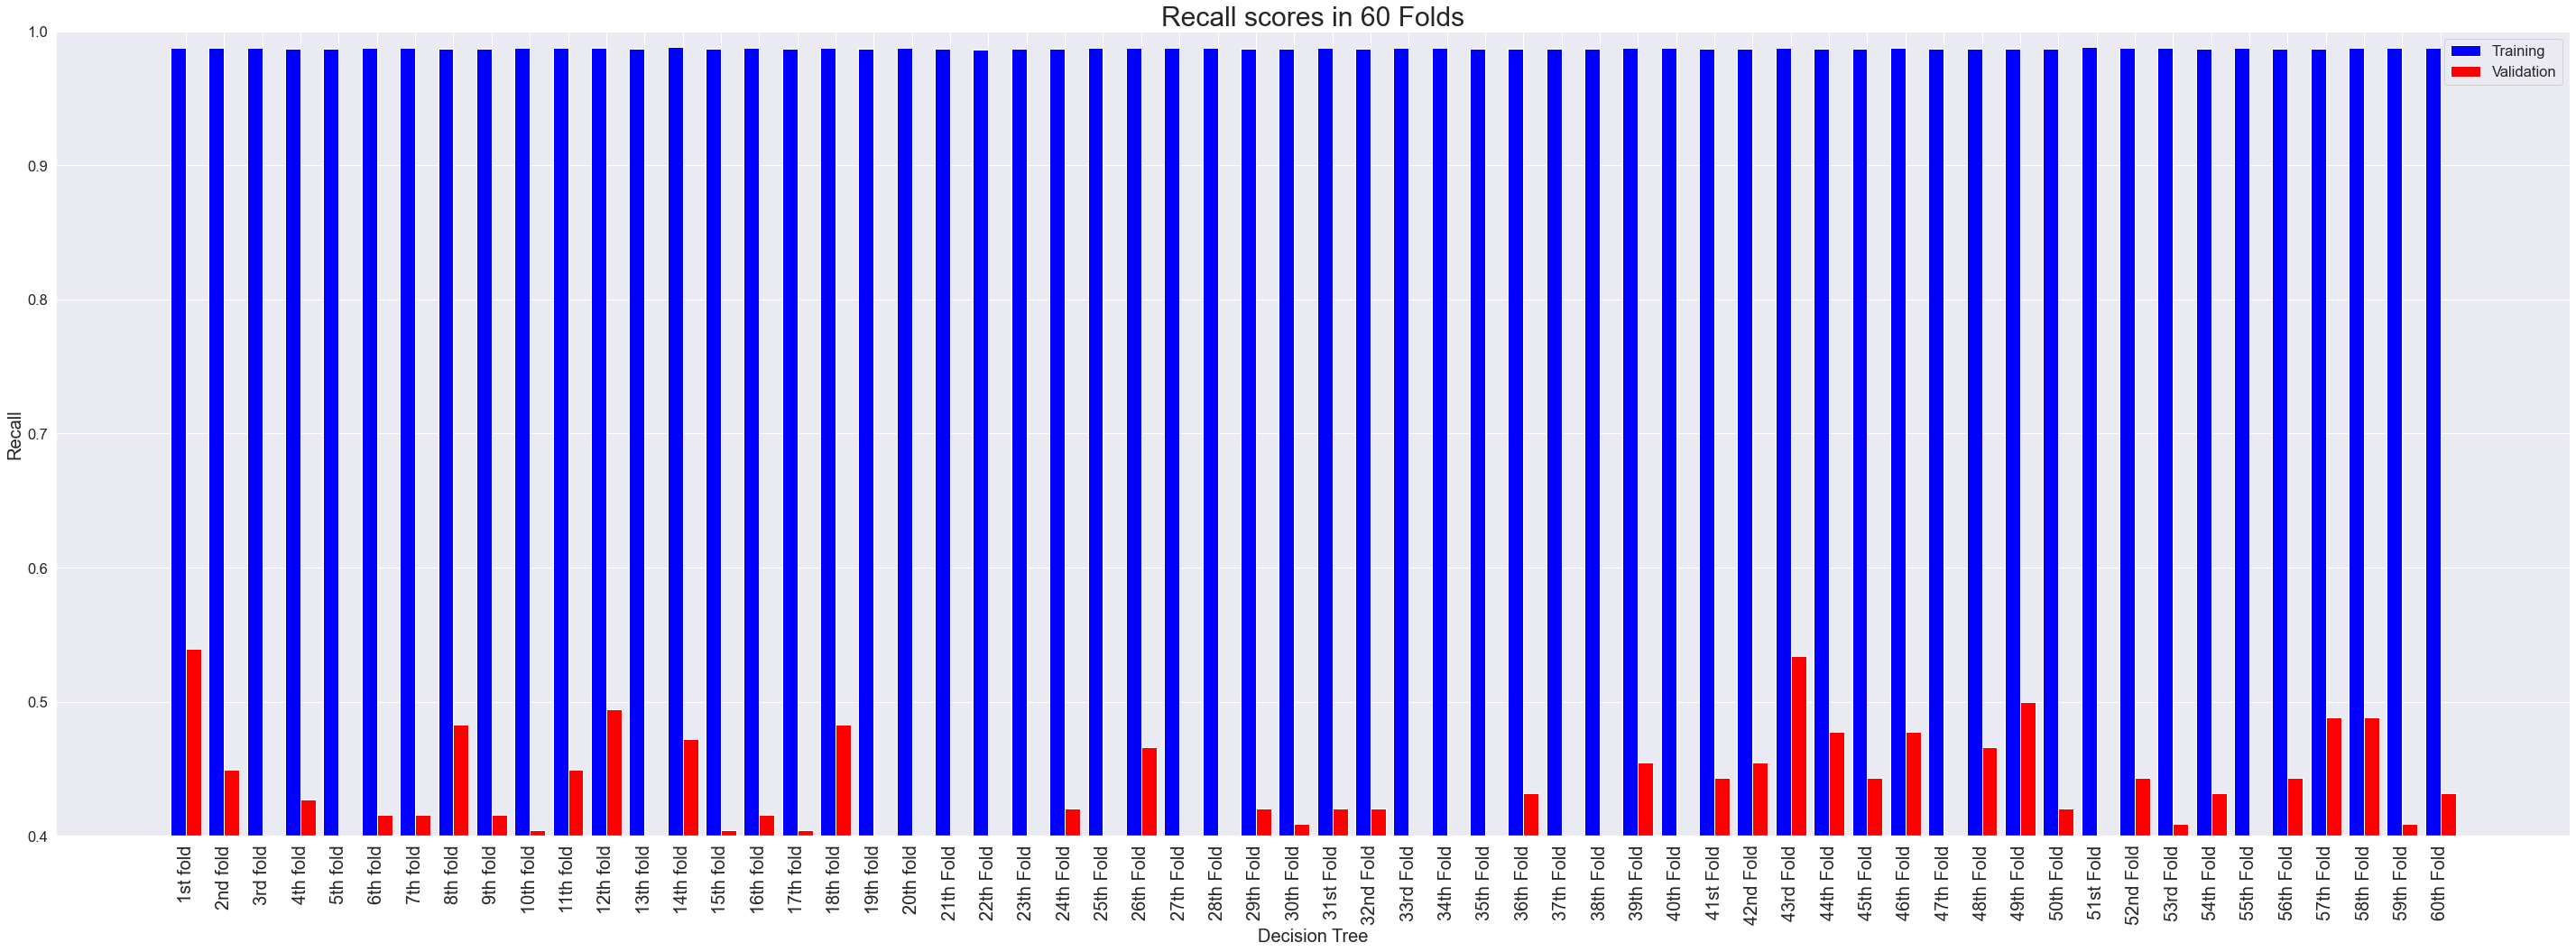

In [77]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 60 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"], 90)

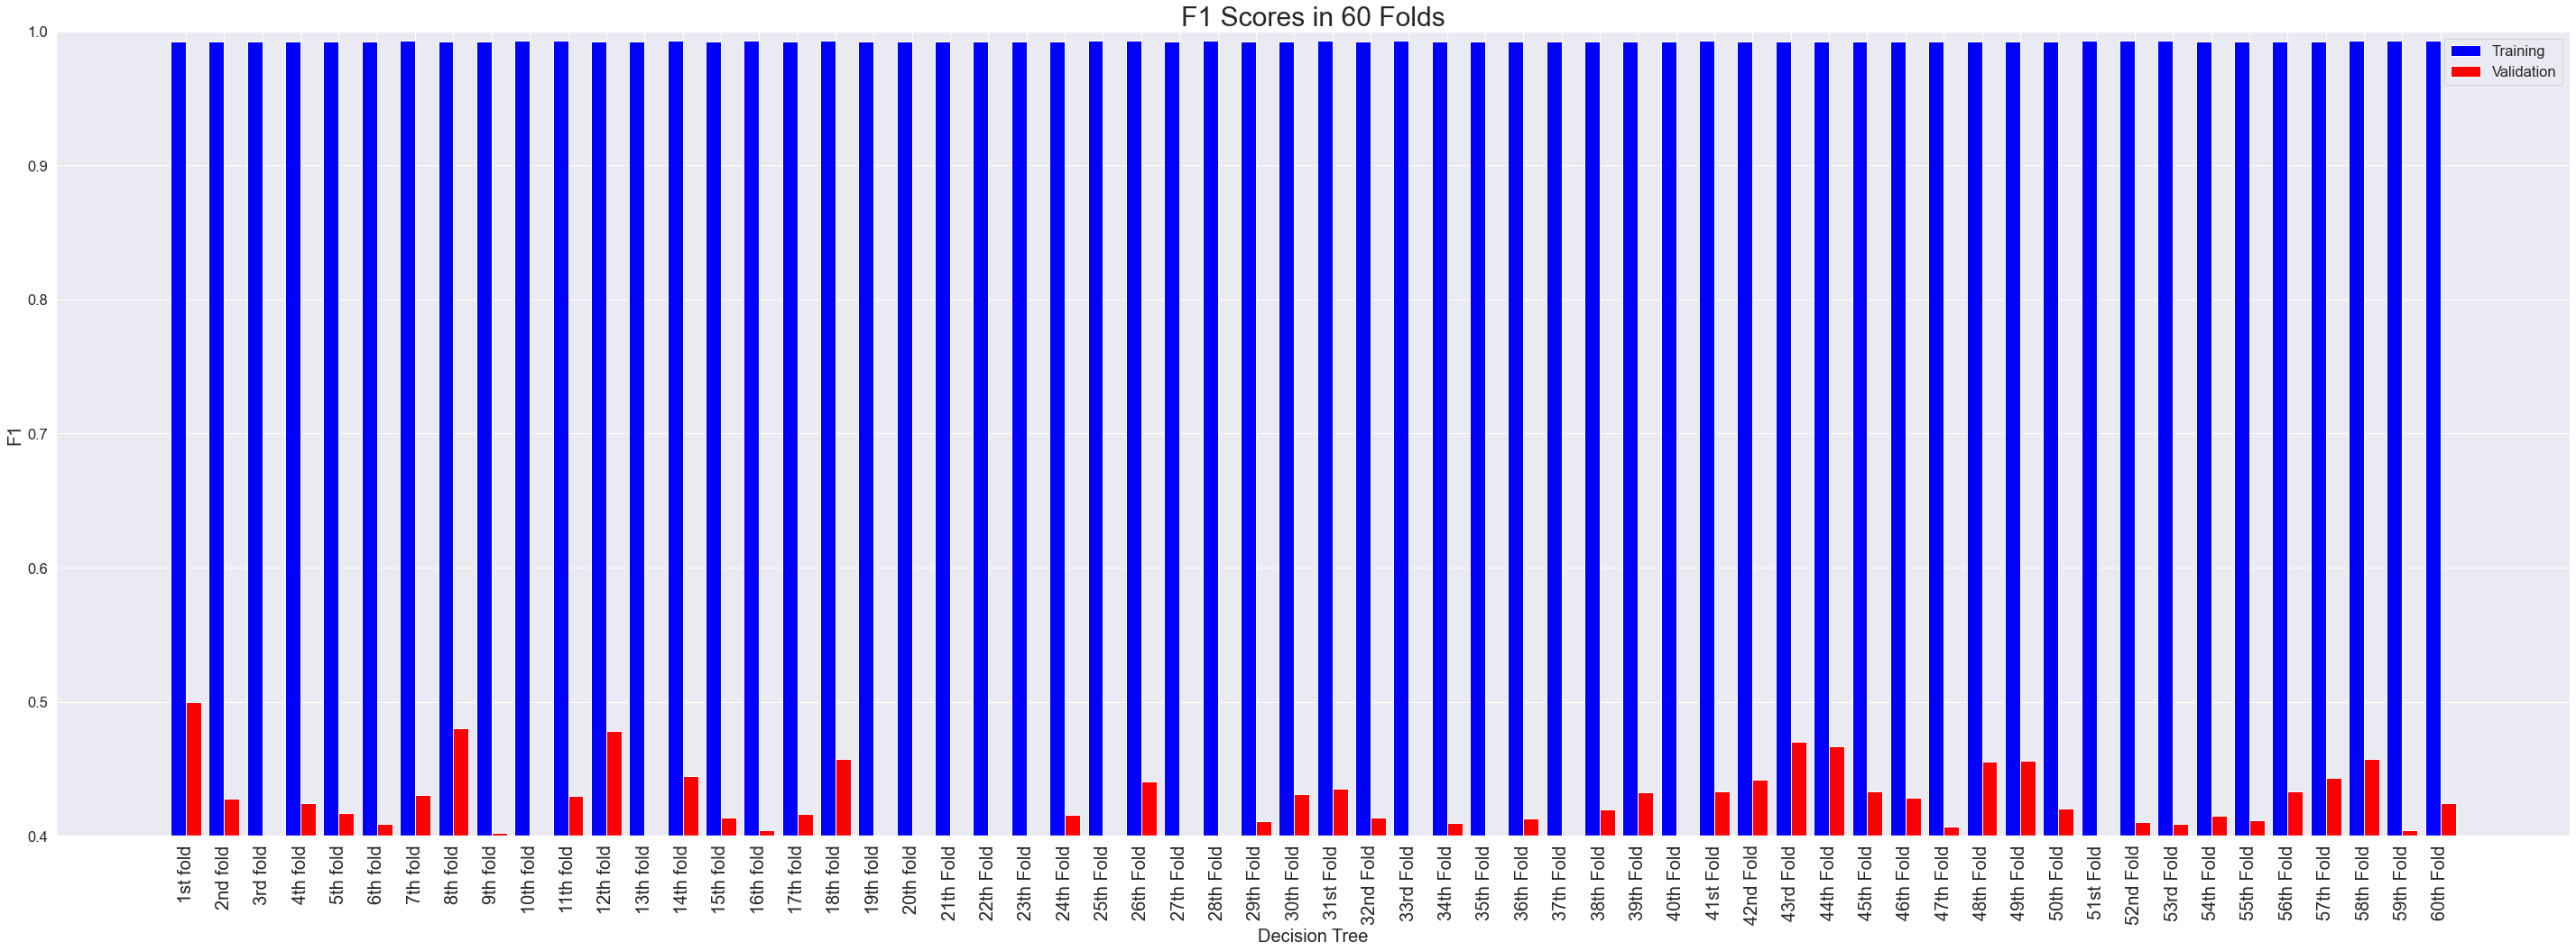

In [78]:
# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 60 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"], 90)

In [79]:
#Using Decision Tree Algorithm
dtc = DecisionTreeClassifier(criterion='entropy', splitter ='random')
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', splitter='random')

In [80]:
#predict probabilities
dtc_probs = dtc.predict_proba(X_test)

In [81]:
#keeping probabilities for the positive outcome only
dtc_probs = dtc_probs[:,1]

In [82]:
#prediction of class values (0 or 1)
y_pred_train = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
#confusion Matrix
cm_train = confusion_matrix(Y_train, y_pred_train)
cm_test = confusion_matrix(Y_test, y_pred)
print("Train Confusion Matrix:")
print(cm_train)
print("Test Confusion Matrix:")
print(cm_test)

Train Confusion Matrix:
[[18690    11]
 [   67  5232]]
Test Confusion Matrix:
[[3848  815]
 [ 805  532]]


Train Confusion Matrix					Test Confusion Matrix



<AxesSubplot:>

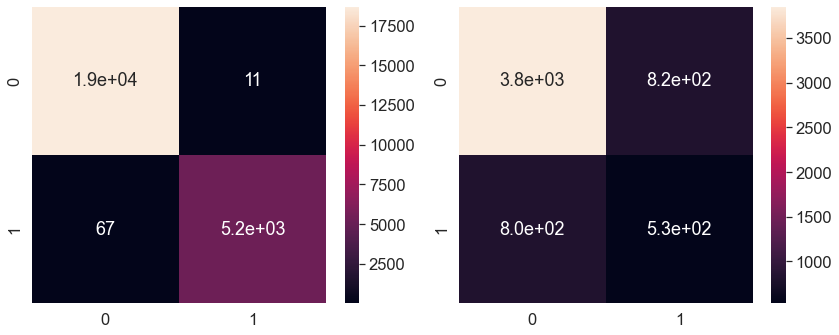

In [85]:
figsize=(25,20)
print("Train Confusion Matrix\t\t\t\t\tTest Confusion Matrix\n")
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_train, y_pred_train), annot = True)
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True)

In [86]:
#calculate precision-recall curve
dtc_precision, dtc_recall, _ =precision_recall_curve(Y_test,dtc_probs)

In [87]:
#calculate f1 score and auc score
dtc_f1, dtc_auc = f1_score(Y_test,y_pred), auc(dtc_recall,dtc_precision)

In [88]:
#summarize scores
print("Decision Tree:f1= %.3f auc= %.3f"%(dtc_f1,dtc_auc))

Decision Tree:f1= 0.396 auc= 0.463


In [89]:
print("Train Classification Report\n")
print(classification_report(Y_train, y_pred_train))
print("Test Classification Report\n")
print(classification_report(Y_test, y_pred))

Train Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18701
           1       1.00      0.99      0.99      5299

    accuracy                           1.00     24000
   macro avg       1.00      0.99      1.00     24000
weighted avg       1.00      1.00      1.00     24000

Test Classification Report

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4663
           1       0.39      0.40      0.40      1337

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



Train and test metrics show that the model is overfitting.

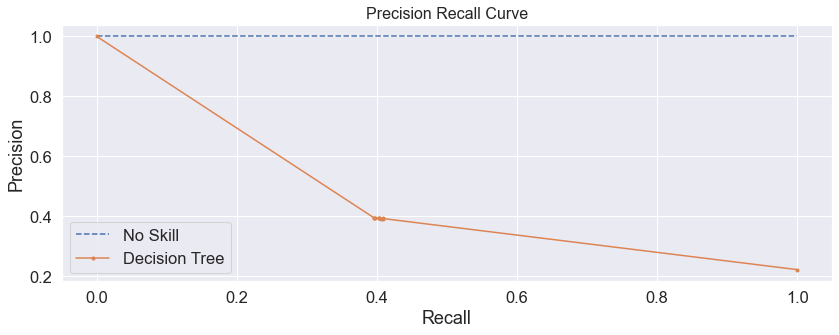

In [90]:
#plotting the precision-recall curves
no_skill = len(Y_test[Y_test==1])/len(Y_test)
plt.plot([0,1],[no_skill,no_skill],linestyle='--',label='No Skill')
plt.plot(dtc_recall,dtc_precision,marker='.',label='Decision Tree')
#axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
#display the legend
plt.title("Precision Recall Curve",fontsize=16)
plt.legend()
plt.show()

In [91]:
#Visualization of Decision Tree
from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [92]:
features = X.columns

In [93]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

NameError: name 'StringIO' is not defined

In [ ]:
#accuracy score of model
#score = accuracy_score(Y_train,y_pred)
#print("Accuracy score of Baseline model: ",score)

score = accuracy_score(Y_test,y_pred)
print("Accuracy score of Baseline model: ",score)

In [ ]:
#Gathering better results through Hyper-parameter tuning
max_depth = np.linspace(1,50,50,endpoint=True)

train_results = []
test_results = []

for depth in max_depth:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train,Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train =accuracy_score(Y_train,train_pred)
    
    #accuracy score of train_data
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test,test_pred)
    
    #accuracy score of test data
    test_results.append(acc_score_test)

plt.figure(figsize=(20,8))
line1, = plt.plot(max_depth, train_results, 'b',label='Train data')
line2, = plt.plot(max_depth, test_results, 'r',label='Test data')

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Size of tree(No of nodes)", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Accuracy Obtained by fine-tuning max_depth of tree",fontsize=18)
plt.show()

Hyper-tuning the model parameters

In [ ]:
#min_samples_split
min_split = np.linspace(0.001,0.2,100,endpoint=True)

train_results = []
test_results = []

for split in min_split:
    dt = DecisionTreeClassifier(min_samples_split=split)
    dt.fit(X_train,Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train,train_pred)
    
    #accuracy score of train_data
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test,test_pred)
    
    #accuracy score of test data
    test_results.append(acc_score_test)
    
plt.figure(figsize=(20,8))
line1, = plt.plot(min_split, train_results, 'b',label='Train data')
line2, = plt.plot(min_split, test_results, 'r',label='Test data')

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Min samples of split", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Accuracy Obtained by fine-tuning min_split of tree",fontsize=18)
plt.show()

In [ ]:
#min_samples_leaf
min_leaf = np.linspace(0.001,0.1,100,endpoint=True)

train_results = []
test_results = []

for leaf in min_leaf:
    dt = DecisionTreeClassifier(min_samples_leaf=leaf)
    dt.fit(X_train,Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train,train_pred)
    
    #accuracy score of train_data
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test,test_pred)
    
    #accuracy score of test data
    test_results.append(acc_score_test)
    
plt.figure(figsize=(20,8))
line1, = plt.plot(min_leaf, train_results, 'b',label='Train data')
line2, = plt.plot(min_leaf, test_results, 'r',label='Test data')

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Min samples of leaf", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Accuracy Obtained by fine-tuning min samples of leaf",fontsize=18)
plt.show()

In [ ]:
#max features
max_features = list(range(1,X.shape[1],1))

train_results = []
test_results = []

for feature in max_features:
    dt = DecisionTreeClassifier(max_features=feature)
    dt.fit(X_train,Y_train)
    
    train_pred = dt.predict(X_train)
    acc_score_train = accuracy_score(Y_train,train_pred)
    
    #accuracy score of train_data
    train_results.append(acc_score_train)
    
    test_pred = dt.predict(X_test)
    acc_score_test = accuracy_score(Y_test,test_pred)
    
    #accuracy score of test data
    test_results.append(acc_score_test)
    
plt.figure(figsize=(20,8))
line1, = plt.plot(max_features, train_results, 'b',label='Train data')
line2, = plt.plot(max_features, test_results, 'r',label='Test data')

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Max features of the tree", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=15)
plt.title("Accuracy Obtained considering the max features of the tree",fontsize=18)
plt.show()